In [76]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sns

### Data Cleaning

In [77]:
df1  = pd.read_csv("train-chennai-sale.csv")
df1.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [78]:
df1.shape

(7109, 22)

In [79]:
#REMOVAL OF ERRORS AND DUPLICATE ELEMENTS IN THE COLUMNS 

In [80]:
df2 = df1.drop(['MZZONE'], axis = 'columns')
# Dropping the MZZONE as it off less relevance
df2.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,BUILDTYPE,UTILITY_AVAIL,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,Commercial,AllPub,Paved,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,Commercial,AllPub,Gravel,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,Commercial,ELO,Gravel,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,Others,NoSewr,Paved,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,Others,AllPub,Gravel,3.0,2.5,4.1,3.290,237000,74063,7406250


In [81]:
#Removing the null values 
df2.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [82]:
df3 = df2.dropna()
df3.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [83]:
# Removing the errors and duplicate elements

In [84]:
# AREA

In [85]:
df1.groupby('AREA')['AREA'].agg('count')

AREA
Adyar          773
Adyr             1
Ana Nagar        3
Ann Nagar        2
Anna Nagar     783
Chormpet         6
Chrmpet          6
Chrompet      1681
Chrompt          9
KK Nagar       996
KKNagar          1
Karapakam        3
Karapakkam    1363
T Nagar        496
TNagar           5
Velachery      979
Velchery         2
Name: AREA, dtype: int64

In [86]:
df1["AREA"].replace({"Adyr": "Adyar", "Ana Nagar": "Anna Nagar", "Ann Nagar":"Anna Nagar","Chormpet":"Chrompet","Chrmpet":"Chrompet","Chrompt":"Chrompet","KKNagar":"KK Nagar","Karapakam":"Karapakkam","TNagar":"T Nagar","Velchery":"Velachery"}, inplace=True) #Cleaning the AREA column to correct the entries with misppled

In [87]:
df1.groupby('AREA')['AREA'].agg('count') #

AREA
Adyar          774
Anna Nagar     788
Chrompet      1702
KK Nagar       997
Karapakkam    1366
T Nagar        501
Velachery      981
Name: AREA, dtype: int64

In [88]:
# SALE_COND

In [89]:
df3['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [90]:
df3.groupby('SALE_COND')['SALE_COND'].agg('count')

SALE_COND
Ab Normal         5
AbNormal       1396
Adj Land          6
AdjLand        1426
Family         1390
Normal Sale    1416
PartiaLl          1
Partial        1414
Partiall          2
Name: SALE_COND, dtype: int64

In [91]:
df3["SALE_COND"].replace({"Ab Normal": "AbNormal", "Partiall": "Partial", "Partiall":"Partial","Adj Land":"AdjLand"}, inplace=True) #Cleaning the AREA column to correct the entries with misppled

C:\Users\ajaym\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [92]:
df3["SALE_COND"].replace({"PartiaLl":"Partial"}, inplace = True)

In [93]:
df3.groupby('SALE_COND')['SALE_COND'].agg('count')

SALE_COND
AbNormal       1401
AdjLand        1432
Family         1390
Normal Sale    1416
Partial        1417
Name: SALE_COND, dtype: int64

In [94]:
#BUILD_TYPE

In [95]:
df3.groupby('BUILDTYPE')['BUILDTYPE'].agg('count')

BUILDTYPE
Comercial        4
Commercial    2307
House         2433
Other           25
Others        2287
Name: BUILDTYPE, dtype: int64

In [96]:
df3["BUILDTYPE"].replace({"Comercial":"Commercial", "Other":"Others"}, inplace = True)

In [97]:
df3.groupby('BUILDTYPE')['BUILDTYPE'].agg('count')

BUILDTYPE
Commercial    2311
House         2433
Others        2312
Name: BUILDTYPE, dtype: int64

In [98]:
#PARK_FACIL

In [99]:
df3.groupby('PARK_FACIL')['PARK_FACIL'].agg('count')

PARK_FACIL
No     3498
Noo       1
Yes    3557
Name: PARK_FACIL, dtype: int64

In [100]:
df3["PARK_FACIL"].replace({"Noo":"No"}, inplace = True)

In [101]:
df3.groupby('PARK_FACIL')['PARK_FACIL'].agg('count')

PARK_FACIL
No     3499
Yes    3557
Name: PARK_FACIL, dtype: int64

In [102]:
#UTILITY_AVAIL

In [103]:
df3["UTILITY_AVAIL"].replace({"All Pub":"AllPub"}, inplace = True)

In [104]:
df3["UTILITY_AVAIL"].replace({"NoSewr":"NoSeWa"}, inplace = True)

In [105]:
df3.groupby('UTILITY_AVAIL')['UTILITY_AVAIL'].agg('count')

UTILITY_AVAIL
AllPub     1875
ELO        1509
NoSeWa     1860
NoSewr     1812
Name: UTILITY_AVAIL, dtype: int64

In [106]:
#STREET

In [107]:
df3.groupby('STREET')['STREET'].agg('count')

STREET
Gravel       2502
No Access    1993
NoAccess        7
Pavd           12
Paved        2542
Name: STREET, dtype: int64

In [108]:
df3["STREET"].replace({"NoAccess":"No Access", "Pavd":"Paved"}, inplace = True)

In [109]:
df3.groupby('STREET')['STREET'].agg('count')

STREET
Gravel       2502
No Access    2000
Paved        2554
Name: STREET, dtype: int64

In [160]:
df3.DIST_MAINROAD.describe()

count    7056.000000
mean       99.569161
std        57.403870
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

C:\Users\ajaym\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DIST_MAINROAD'>

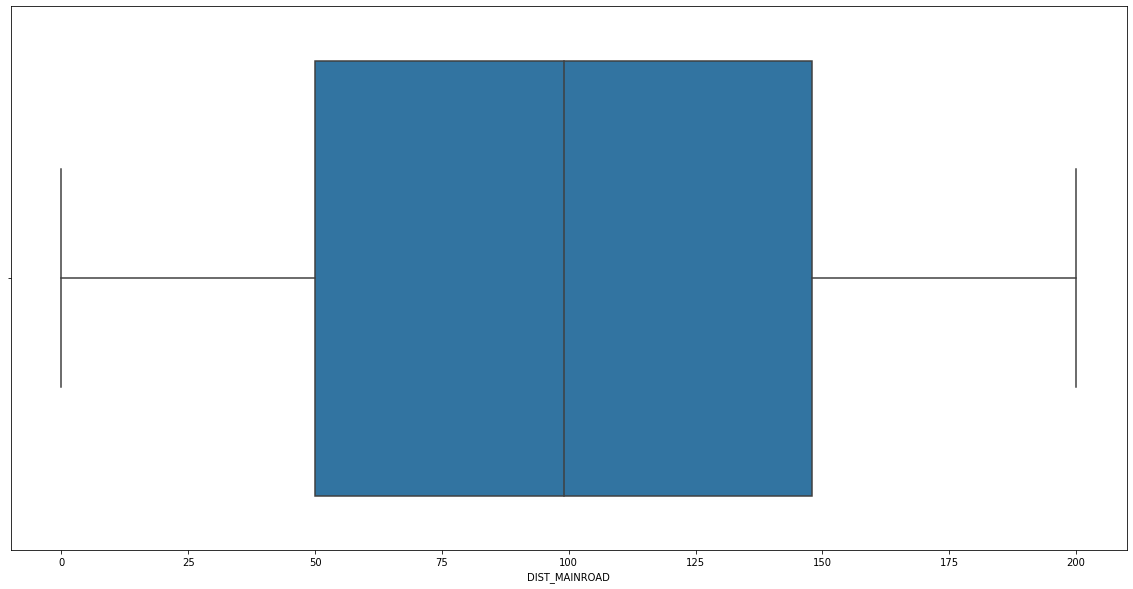

In [161]:
sns.boxplot(df5.DIST_MAINROAD) #It does not have any outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x1fbe88d6400>,
 'caps': [<matplotlib.lines.Line2D at 0x1fbe88d6b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fbe88d1f40>],
 'medians': [<matplotlib.lines.Line2D at 0x1fbe88eb610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fbe88eb8b0>],
 'means': []}

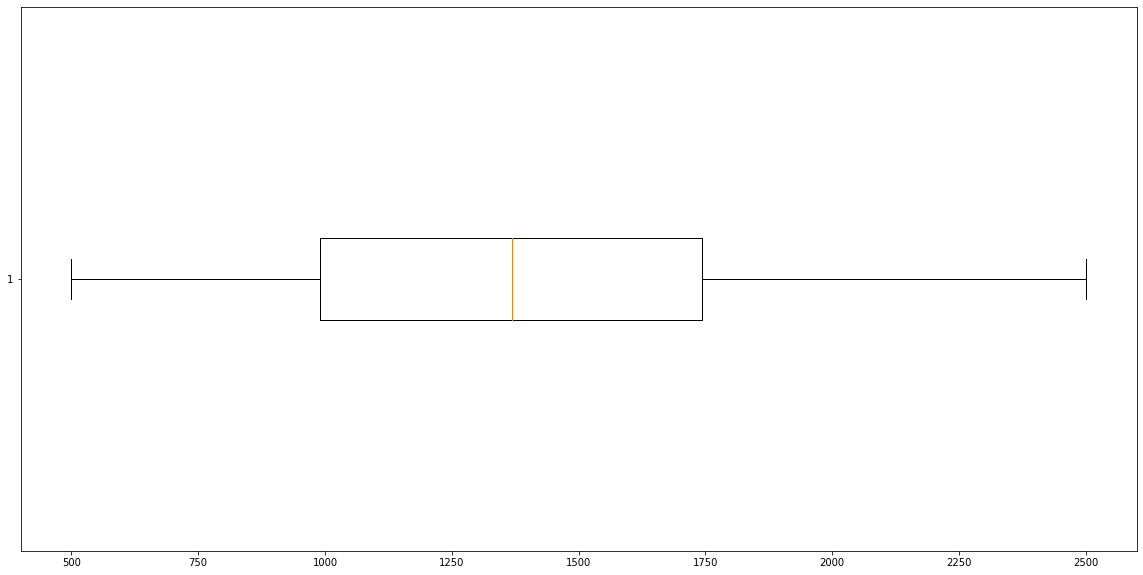

In [185]:
plt.boxplot(df3.INT_SQFT, vert = 0)

In [110]:
df3.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,BUILDTYPE,UTILITY_AVAIL,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,Commercial,AllPub,Paved,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,Commercial,AllPub,Gravel,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,Commercial,ELO,Gravel,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,Others,NoSewr,Paved,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,Others,AllPub,Gravel,3.0,2.5,4.1,3.290,237000,74063,7406250


In [111]:
#Checking for the unique values

In [112]:
df3['N_ROOM'].unique()



array([3, 5, 4, 2, 6], dtype=int64)

In [113]:
df3['N_BATHROOM'].unique()

array([1., 2.])

In [114]:
df3['N_BEDROOM'].unique()

array([1., 2., 3., 4.])

In [115]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7056 non-null   object 
 1   AREA           7056 non-null   object 
 2   INT_SQFT       7056 non-null   int64  
 3   DATE_SALE      7056 non-null   object 
 4   DIST_MAINROAD  7056 non-null   int64  
 5   N_BEDROOM      7056 non-null   float64
 6   N_BATHROOM     7056 non-null   float64
 7   N_ROOM         7056 non-null   int64  
 8   SALE_COND      7056 non-null   object 
 9   PARK_FACIL     7056 non-null   object 
 10  DATE_BUILD     7056 non-null   object 
 11  BUILDTYPE      7056 non-null   object 
 12  UTILITY_AVAIL  7056 non-null   object 
 13  STREET         7056 non-null   object 
 14  QS_ROOMS       7056 non-null   float64
 15  QS_BATHROOM    7056 non-null   float64
 16  QS_BEDROOM     7056 non-null   float64
 17  QS_OVERALL     7056 non-null   float64
 18  REG_FEE 

In [116]:
df3['N_BEDROOM'] = df3['N_BEDROOM'].astype(int) # Converting to integer type

C:\Users\ajaym\AppData\Local\Temp/ipykernel_4504/4046800632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['N_BEDROOM'] = df3['N_BEDROOM'].astype(int) # Converting to integer type


In [117]:
df3['N_BATHROOM'] = df3['N_BATHROOM'].astype('int32')

C:\Users\ajaym\AppData\Local\Temp/ipykernel_4504/3472267683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['N_BATHROOM'] = df3['N_BATHROOM'].astype('int32')


In [118]:
df3['N_ROOM'] = df3['N_ROOM'].astype('int32')

C:\Users\ajaym\AppData\Local\Temp/ipykernel_4504/2521149751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['N_ROOM'] = df3['N_ROOM'].astype('int32')


In [119]:
df3['SALES_PRICE'] = df3['SALES_PRICE'].astype('int32')

C:\Users\ajaym\AppData\Local\Temp/ipykernel_4504/4071646111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['SALES_PRICE'] = df3['SALES_PRICE'].astype('int32')


In [121]:
df3['INT_SQFT'] = df3['INT_SQFT'].astype('int32')
df3['DIST_MAINROAD'] = df3['DIST_MAINROAD'].astype('int32')
df3['N_ROOM'] = df3['N_ROOM'].astype('int32')
df3['QS_ROOMS'] = df3['QS_ROOMS'].astype('int32')
df3['QS_BATHROOM'] = df3['QS_BATHROOM'].astype('int32')
df3['QS_BEDROOM'] = df3['QS_BEDROOM'].astype('int32')
df3['QS_OVERALL'] = df3['QS_OVERALL'].astype('int32')


C:\Users\ajaym\AppData\Local\Temp/ipykernel_4504/2442218771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['INT_SQFT'] = df3['INT_SQFT'].astype('int32')
C:\Users\ajaym\AppData\Local\Temp/ipykernel_4504/2442218771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['DIST_MAINROAD'] = df3['DIST_MAINROAD'].astype('int32')
C:\Users\ajaym\AppData\Local\Temp/ipykernel_4504/2442218771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [122]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PRT_ID         7056 non-null   object
 1   AREA           7056 non-null   object
 2   INT_SQFT       7056 non-null   int32 
 3   DATE_SALE      7056 non-null   object
 4   DIST_MAINROAD  7056 non-null   int32 
 5   N_BEDROOM      7056 non-null   int32 
 6   N_BATHROOM     7056 non-null   int32 
 7   N_ROOM         7056 non-null   int32 
 8   SALE_COND      7056 non-null   object
 9   PARK_FACIL     7056 non-null   object
 10  DATE_BUILD     7056 non-null   object
 11  BUILDTYPE      7056 non-null   object
 12  UTILITY_AVAIL  7056 non-null   object
 13  STREET         7056 non-null   object
 14  QS_ROOMS       7056 non-null   int32 
 15  QS_BATHROOM    7056 non-null   int32 
 16  QS_BEDROOM     7056 non-null   int32 
 17  QS_OVERALL     7056 non-null   int32 
 18  REG_FEE        7056 non-null

In [123]:
df3['DIST_MAINROAD'] = df3['DIST_MAINROAD'].astype('int32')
df3['INT_SQFT'] = df3['INT_SQFT'].astype('int32')

C:\Users\ajaym\AppData\Local\Temp/ipykernel_4504/285766947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['DIST_MAINROAD'] = df3['DIST_MAINROAD'].astype('int32')
C:\Users\ajaym\AppData\Local\Temp/ipykernel_4504/285766947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['INT_SQFT'] = df3['INT_SQFT'].astype('int32')


In [124]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PRT_ID         7056 non-null   object
 1   AREA           7056 non-null   object
 2   INT_SQFT       7056 non-null   int32 
 3   DATE_SALE      7056 non-null   object
 4   DIST_MAINROAD  7056 non-null   int32 
 5   N_BEDROOM      7056 non-null   int32 
 6   N_BATHROOM     7056 non-null   int32 
 7   N_ROOM         7056 non-null   int32 
 8   SALE_COND      7056 non-null   object
 9   PARK_FACIL     7056 non-null   object
 10  DATE_BUILD     7056 non-null   object
 11  BUILDTYPE      7056 non-null   object
 12  UTILITY_AVAIL  7056 non-null   object
 13  STREET         7056 non-null   object
 14  QS_ROOMS       7056 non-null   int32 
 15  QS_BATHROOM    7056 non-null   int32 
 16  QS_BEDROOM     7056 non-null   int32 
 17  QS_OVERALL     7056 non-null   int32 
 18  REG_FEE        7056 non-null

In [125]:
df3.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,BUILDTYPE,UTILITY_AVAIL,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1,1,3,AbNormal,Yes,...,Commercial,AllPub,Paved,4,3,4,4,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2,1,5,AbNormal,No,...,Commercial,AllPub,Gravel,4,4,2,3,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1,1,3,AbNormal,Yes,...,Commercial,ELO,Gravel,4,3,2,3,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3,2,5,Family,No,...,Others,NoSewr,Paved,4,3,3,4,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1,1,3,AbNormal,Yes,...,Others,AllPub,Gravel,3,2,4,3,237000,74063,7406250


In [126]:
#Dropping REG_FEES and COMMIS

In [127]:
df4 = df3.drop(['REG_FEE','COMMIS'], axis = 'columns')


In [128]:
df4.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1,1,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,4,3,4,4,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2,1,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,4,4,2,3,21717770
2,P01812,Adyar,909,04-02-2012,70,1,1,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,4,3,2,3,13159200
3,P05346,Velachery,1855,13-03-2010,14,3,2,5,Family,No,18-03-1988,Others,NoSewr,Paved,4,3,3,4,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1,1,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,3,2,4,3,7406250


In [129]:
#FORMATTING THE DATE AND AGE OF BUILDING

In [130]:
df4['DATE_SALE'] = pd.to_datetime(df4['DATE_SALE'])
df4['DATE_BUILD'] = pd.to_datetime(df4['DATE_BUILD'])

In [131]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7056 non-null   object        
 1   AREA           7056 non-null   object        
 2   INT_SQFT       7056 non-null   int32         
 3   DATE_SALE      7056 non-null   datetime64[ns]
 4   DIST_MAINROAD  7056 non-null   int32         
 5   N_BEDROOM      7056 non-null   int32         
 6   N_BATHROOM     7056 non-null   int32         
 7   N_ROOM         7056 non-null   int32         
 8   SALE_COND      7056 non-null   object        
 9   PARK_FACIL     7056 non-null   object        
 10  DATE_BUILD     7056 non-null   datetime64[ns]
 11  BUILDTYPE      7056 non-null   object        
 12  UTILITY_AVAIL  7056 non-null   object        
 13  STREET         7056 non-null   object        
 14  QS_ROOMS       7056 non-null   int32         
 15  QS_BATHROOM    7056 n

In [132]:
#AGE OF THE BUILDING

In [133]:
df4['YEAR_SALE'] = pd.DatetimeIndex(df4['DATE_SALE']).year
df4['YEAR_BUILD'] = pd.DatetimeIndex(df4['DATE_BUILD']).year

df4['AGE'] = df4['YEAR_SALE'] - df4['YEAR_BUILD']

In [134]:
df4.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YEAR_SALE,YEAR_BUILD,AGE
0,P03210,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,...,AllPub,Paved,4,3,4,4,7600000,2011,1967,44
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,...,AllPub,Gravel,4,4,2,3,21717770,2006,1995,11
2,P01812,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,...,ELO,Gravel,4,3,2,3,13159200,2012,1992,20
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,...,NoSewr,Paved,4,3,3,4,9630290,2010,1988,22
4,P06210,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,...,AllPub,Gravel,3,2,4,3,7406250,2009,1979,30


In [135]:
#Dropping the Date of Sale and Date of build

In [136]:
df4.drop(["DATE_SALE", "DATE_BUILD"], axis = 1)

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YEAR_SALE,YEAR_BUILD,AGE
0,P03210,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,4,3,4,4,7600000,2011,1967,44
1,P09411,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,4,4,2,3,21717770,2006,1995,11
2,P01812,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,4,3,2,3,13159200,2012,1992,20
3,P05346,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,4,3,3,4,9630290,2010,1988,22
4,P06210,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,3,2,4,3,7406250,2009,1979,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1,1,2,AdjLand,No,Others,ELO,No Access,3,2,2,2,5353000,2011,1962,49
7105,P10000,Velachery,1897,52,3,2,5,Family,Yes,Others,NoSeWa,No Access,3,4,3,3,10818480,2004,1995,9
7106,P09594,Velachery,1614,152,2,1,4,Normal Sale,No,House,NoSeWa,Gravel,4,4,2,3,8351410,2006,1978,28
7107,P06508,Karapakkam,787,40,1,1,2,Partial,Yes,Commercial,ELO,Paved,4,3,4,4,8507000,2009,1977,32


In [138]:
df4['YEAR_SALE'] = df4['YEAR_SALE'].astype('int32')
df4['YEAR_BUILD'] = df4['YEAR_BUILD'].astype('int32')
df4['AGE'] = df4['AGE'].astype('int32')

In [139]:
df5 = df4.drop(["DATE_SALE", "DATE_BUILD"], axis = 1)

In [140]:
df5.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YEAR_SALE,YEAR_BUILD,AGE
0,P03210,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,4,3,4,4,7600000,2011,1967,44
1,P09411,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,4,4,2,3,21717770,2006,1995,11
2,P01812,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,4,3,2,3,13159200,2012,1992,20
3,P05346,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,4,3,3,4,9630290,2010,1988,22
4,P06210,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,3,2,4,3,7406250,2009,1979,30


Feature Engineering and Dimensionality reduction

In [141]:
df5.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YEAR_SALE,YEAR_BUILD,AGE
0,P03210,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,4,3,4,4,7600000,2011,1967,44
1,P09411,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,4,4,2,3,21717770,2006,1995,11
2,P01812,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,4,3,2,3,13159200,2012,1992,20
3,P05346,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,4,3,3,4,9630290,2010,1988,22
4,P06210,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,3,2,4,3,7406250,2009,1979,30


In [142]:
    #INFLATION ADJUSTED SALES PRICE

In [143]:
df5['ADJUST_SALE_PRICE'] = df5['SALES_PRICE']*(1.05 ** (2021 - df5['YEAR_SALE']))

In [145]:
df5.AREA = df5.AREA.apply(lambda x: x.strip())

location_stats = df5.groupby('AREA')['AREA'].agg('count').sort_values(ascending = False)
location_stats

AREA
Chrompet      1671
Karapakkam    1356
KK Nagar       989
Velachery      973
Anna Nagar     772
Adyar          768
T Nagar        490
Chrompt          9
Chrmpet          6
Chormpet         5
TNagar           5
Karapakam        3
Ana Nagar        3
Ann Nagar        2
Velchery         2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [146]:
df5.BUILDTYPE = df5.BUILDTYPE.apply(lambda x: x.strip())

location_stats = df5.groupby('BUILDTYPE')['BUILDTYPE'].agg('count').sort_values(ascending = False)
location_stats

BUILDTYPE
House         2433
Others        2312
Commercial    2311
Name: BUILDTYPE, dtype: int64

In [147]:
df5.SALE_COND = df5.SALE_COND.apply(lambda x: x.strip())

location_stats = df5.groupby('SALE_COND')['SALE_COND'].agg('count').sort_values(ascending = False)
location_stats

SALE_COND
AdjLand        1432
Partial        1417
Normal Sale    1416
AbNormal       1401
Family         1390
Name: SALE_COND, dtype: int64

In [149]:

location_stats = df5.groupby('YEAR_SALE')['YEAR_SALE'].agg('count').sort_values(ascending = False)
location_stats

YEAR_SALE
2010    1331
2011    1285
2009    1117
2008     813
2012     648
2007     642
2013     364
2014     331
2006     251
2004     116
2005     107
2015      51
Name: YEAR_SALE, dtype: int64

In [151]:
df5.STREET = df5.STREET.apply(lambda x: x.strip())

location_stats = df5.groupby('STREET')['STREET'].agg('count').sort_values(ascending = False)
location_stats

STREET
Paved        2554
Gravel       2502
No Access    2000
Name: STREET, dtype: int64

In [152]:
df5.UTILITY_AVAIL = df5.UTILITY_AVAIL.apply(lambda x: x.strip())

location_stats = df5.groupby('UTILITY_AVAIL')['UTILITY_AVAIL'].agg('count').sort_values(ascending = False)
location_stats

UTILITY_AVAIL
AllPub    1875
NoSeWa    1860
NoSewr    1812
ELO       1509
Name: UTILITY_AVAIL, dtype: int64

In [153]:
df5.PRT_ID = df5.PRT_ID.apply(lambda x: x.strip())

location_stats = df5.groupby('PRT_ID')['PRT_ID'].agg('count').sort_values(ascending = False)
location_stats


PRT_ID
P00001    1
P06696    1
P06711    1
P06709    1
P06708    1
         ..
P03360    1
P03359    1
P03357    1
P03356    1
P10034    1
Name: PRT_ID, Length: 7056, dtype: int64

### Outlier removal and verification

In [162]:
#Removing those outliers where the entries that are having less than 300 sqft per room

In [163]:
df5[df5.INT_SQFT/ df5.N_ROOM < 300].shape

(491, 21)

In [164]:
df10= df5[~(df5.INT_SQFT/ df5.N_ROOM < 300)]
df10.shape

(6565, 21)

In [165]:
df10.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,...,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YEAR_SALE,YEAR_BUILD,AGE,ADJUST_SALE_PRICE
0,P03210,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,...,Paved,4,3,4,4,7600000,2011,1967,44,1.237960e+07
1,P09411,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,...,Gravel,4,4,2,3,21717770,2006,1995,11,4.514968e+07
2,P01812,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,...,Gravel,4,3,2,3,13159200,2012,1992,20,2.041424e+07
3,P05346,Velachery,1855,14,3,2,5,Family,No,Others,...,Paved,4,3,3,4,9630290,2010,1988,22,1.647106e+07
4,P06210,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,...,Gravel,3,2,4,3,7406250,2009,1979,30,1.330056e+07


In [166]:
df10.ADJUST_SALE_PRICE.describe()

count    6.565000e+03
mean     1.932078e+07
std      6.917991e+06
min      4.235442e+06
25%      1.445033e+07
50%      1.841123e+07
75%      2.302103e+07
max      4.833007e+07
Name: ADJUST_SALE_PRICE, dtype: float64

In [167]:
df10.SALES_PRICE.describe()

count    6.565000e+03
mean     1.108811e+07
std      3.782084e+06
min      2.476375e+06
25%      8.433410e+06
50%      1.055638e+07
75%      1.318570e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

In [168]:
def remove_adjsaleprice(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('AREA'):
        m = np.mean(subdf.ADJUST_SALE_PRICE)
        st = np.std(subdf.ADJUST_SALE_PRICE)
        reduced_df = subdf[(subdf.ADJUST_SALE_PRICE > (m-st))& (subdf.ADJUST_SALE_PRICE <=(m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

df11 = remove_adjsaleprice(df10)
df11.shape

(4478, 21)

In [169]:
df11.head(600)

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,...,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YEAR_SALE,YEAR_BUILD,AGE,ADJUST_SALE_PRICE
0,P01812,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,...,Gravel,4,3,2,3,13159200,2012,1992,20,2.041424e+07
1,P09370,Adyar,1056,83,1,1,3,Partial,Yes,Others,...,Paved,2,3,3,3,9386490,2007,1981,26,1.858461e+07
2,P08160,Adyar,1136,69,1,1,3,Normal Sale,Yes,Others,...,Paved,4,2,2,3,8287550,2008,1978,30,1.562741e+07
3,P02677,Adyar,730,185,1,1,2,AdjLand,Yes,House,...,Gravel,2,4,4,4,8848285,2011,1972,39,1.441292e+07
4,P07194,Adyar,904,52,1,1,3,AdjLand,No,Commercial,...,No Access,3,3,2,3,11601400,2009,1969,40,2.083445e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,P06083,Anna Nagar,1522,15,1,1,4,Family,No,Others,...,No Access,4,4,3,4,11584500,2009,1992,17,2.080410e+07
596,P01239,Anna Nagar,1699,185,1,1,4,AbNormal,Yes,Commercial,...,Gravel,4,2,4,3,19297260,2012,1969,43,2.993638e+07
597,P08347,Anna Nagar,1610,182,1,1,4,AbNormal,Yes,House,...,Gravel,2,4,4,3,12364800,2008,1963,45,2.331567e+07
598,P09065,Anna Nagar,1666,140,1,1,4,Partial,Yes,Others,...,Gravel,2,4,3,3,13009590,2007,1979,28,2.575810e+07


In [170]:

location_stats = df11.groupby('AREA')['AREA'].agg('count').sort_values(ascending = False)
location_stats

AREA
Chrompet      981
Karapakkam    844
KK Nagar      671
Velachery     649
Anna Nagar    529
Adyar         464
T Nagar       324
Chrompt         4
TNagar          4
Ana Nagar       2
Chormpet        2
Ann Nagar       1
Chrmpet         1
Karapakam       1
Velchery        1
Name: AREA, dtype: int64

In [171]:
# Function for calculating whether any price abnormalities are present in the data that have different number of rooms

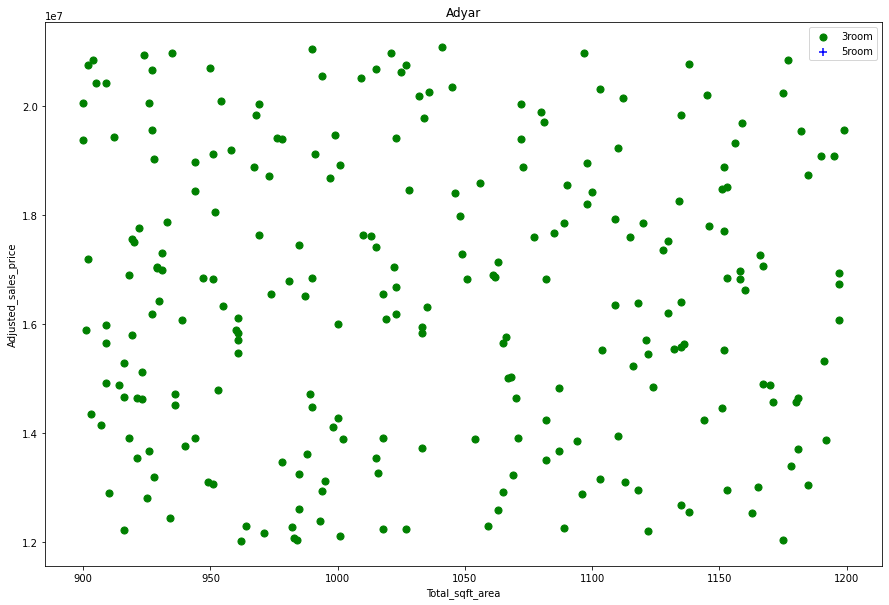

In [172]:
def scatter_plot_chart(df, location,one,two):
    nr_one = df11[(df11.AREA == location)&(df11.N_ROOM == one)]
    nr_two = df11[(df11.AREA == location)&(df11.N_ROOM == two)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(nr_one.INT_SQFT, nr_one.ADJUST_SALE_PRICE, color = 'green', label = str(one) +"room", s =50)
    plt.scatter(nr_two.INT_SQFT, nr_two.ADJUST_SALE_PRICE, marker = '+', color = 'blue', label = str(two) +"room", s =50)
    plt.xlabel("Total_sqft_area")
    plt.ylabel("Adjusted_sales_price")
    plt.title(location)
    plt.legend()
scatter_plot_chart(df11,"Adyar",3,5)

In [173]:
# After checking for mulitple values it is found that there is no price abnormalities for the number of rooms 

Text(0, 0.5, 'count')

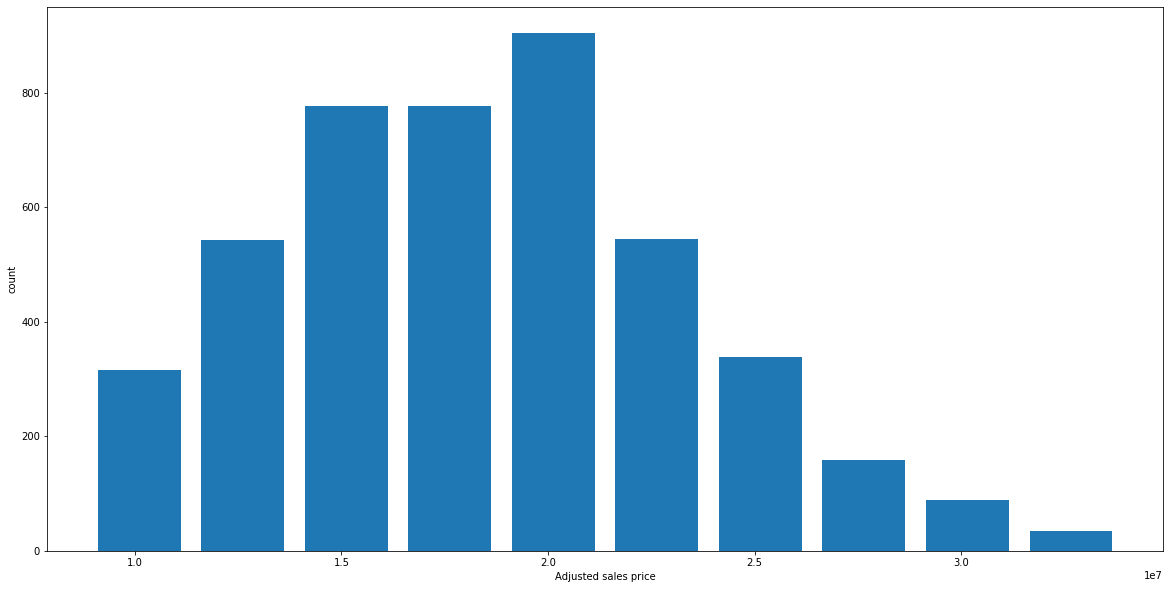

In [174]:
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df11.ADJUST_SALE_PRICE, rwidth = 0.8)
plt.xlabel("Adjusted sales price")
plt.ylabel("count")

In [175]:
#The data follows a normal distribution

In [176]:
df11.N_BATHROOM.unique()

array([1, 2])

In [177]:
df11.N_BEDROOM.unique()

array([1, 2, 3, 4])

Text(0, 0.5, 'count')

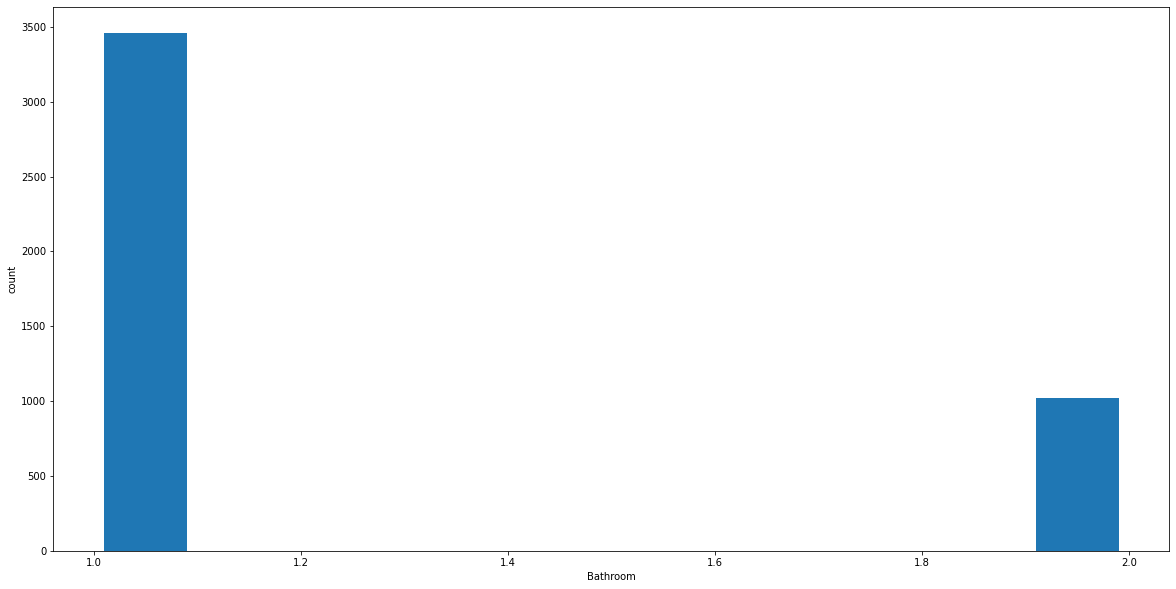

In [178]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df11.N_BATHROOM, rwidth = 0.8)
plt.xlabel("Bathroom")
plt.ylabel("count")

Text(0, 0.5, 'count')

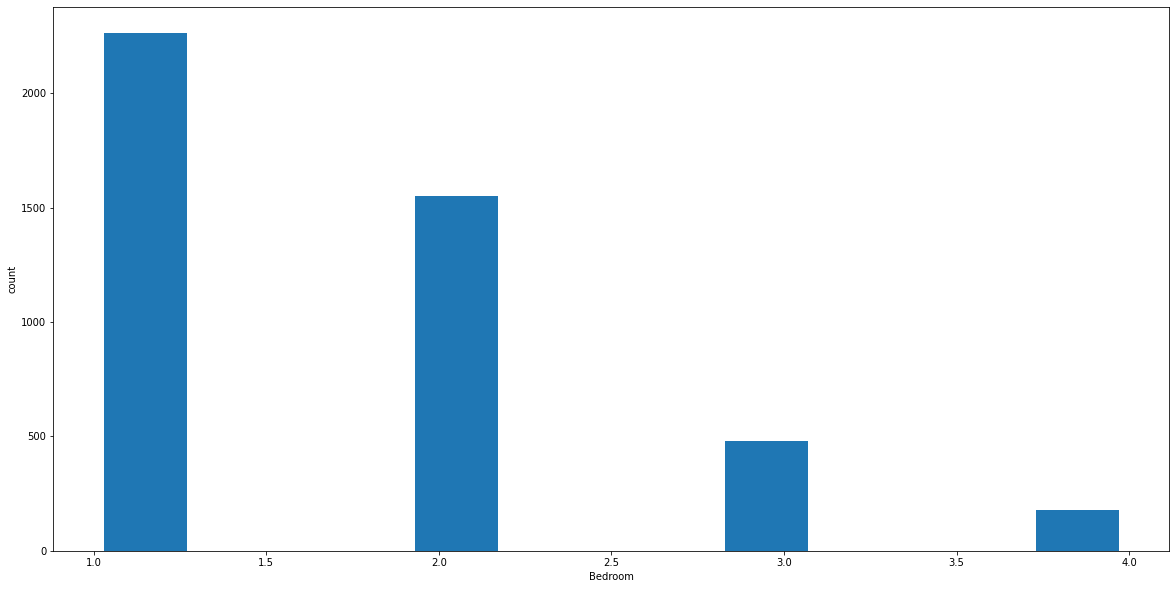

In [179]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df11.N_BEDROOM, rwidth = 0.8)
plt.xlabel("Bedroom")
plt.ylabel("count")

In [180]:
# We are removing records that have bathrooms greater than the number of bedrooms plus 2 

In [181]:
df11[df11.N_BEDROOM < df11.N_BATHROOM] # There are no entries where number of bedrooms are greater than the bathrooms 

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,...,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YEAR_SALE,YEAR_BUILD,AGE,ADJUST_SALE_PRICE


In [182]:
df12 = df11.drop(['QS_ROOMS', 'QS_BATHROOM','QS_BEDROOM','QS_OVERALL'], axis = 1)

In [183]:
df12.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,SALES_PRICE,YEAR_SALE,YEAR_BUILD,AGE,ADJUST_SALE_PRICE
0,P01812,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,13159200,2012,1992,20,2.041424e+07
1,P09370,Adyar,1056,83,1,1,3,Partial,Yes,Others,NoSewr,Paved,9386490,2007,1981,26,1.858461e+07
2,P08160,Adyar,1136,69,1,1,3,Normal Sale,Yes,Others,AllPub,Paved,8287550,2008,1978,30,1.562741e+07
3,P02677,Adyar,730,185,1,1,2,AdjLand,Yes,House,ELO,Gravel,8848285,2011,1972,39,1.441292e+07
4,P07194,Adyar,904,52,1,1,3,AdjLand,No,Commercial,ELO,No Access,11601400,2009,1969,40,2.083445e+07


### Data Visualization

C:\Users\ajaym\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALES_PRICE', ylabel='Density'>

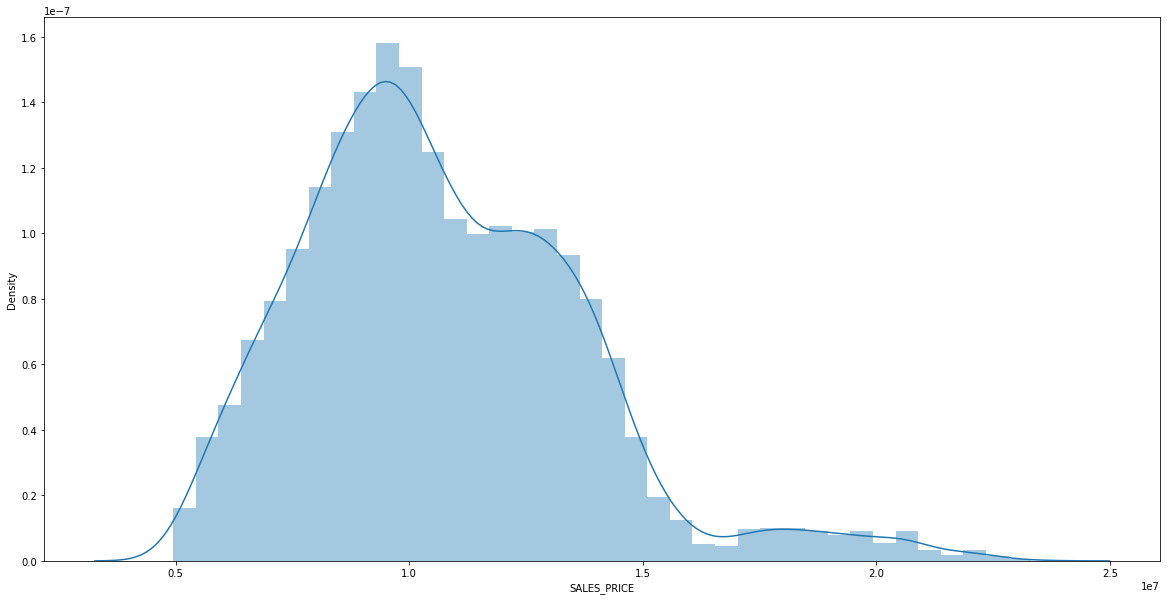

In [186]:
sns.distplot(df12['SALES_PRICE'], kde = True)

C:\Users\ajaym\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ADJUST_SALE_PRICE', ylabel='Density'>

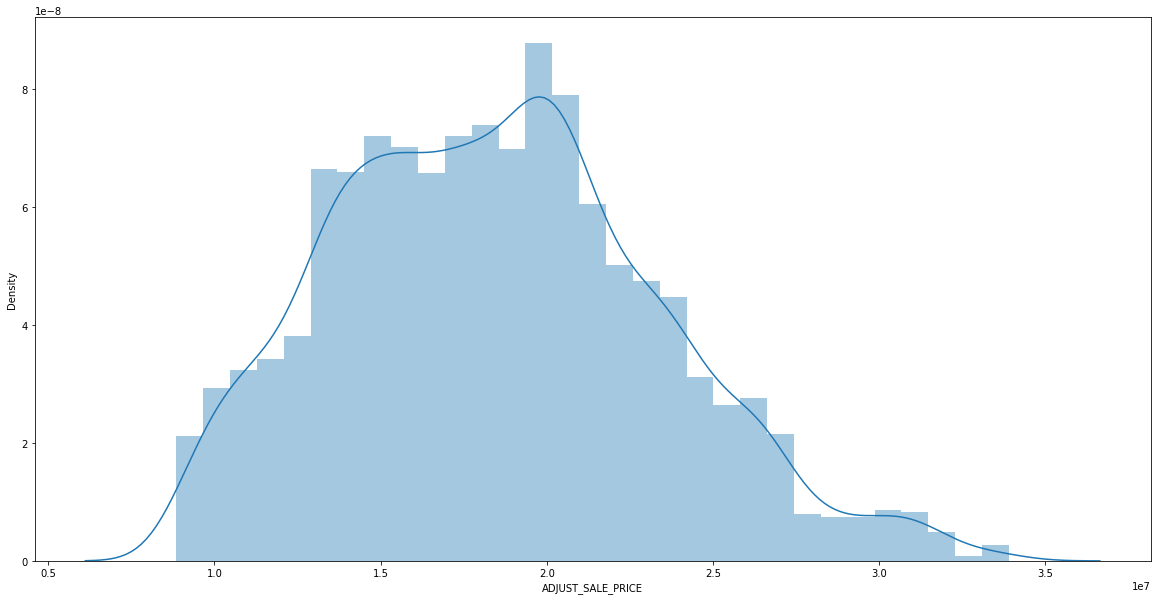

In [187]:
sns.distplot(df12.ADJUST_SALE_PRICE, kde = True)

In [188]:
# This is a right skewed data 

Correlation Matrix

                   INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM    N_ROOM  \
INT_SQFT           1.000000      -0.007182   0.783926    0.511323  0.952904   
DIST_MAINROAD     -0.007182       1.000000  -0.000816    0.012861 -0.007941   
N_BEDROOM          0.783926      -0.000816   1.000000    0.756343  0.842509   
N_BATHROOM         0.511323       0.012861   0.756343    1.000000  0.571087   
N_ROOM             0.952904      -0.007941   0.842509    0.571087  1.000000   
SALES_PRICE        0.560919       0.008891   0.234126   -0.024573  0.531229   
YEAR_SALE         -0.077448       0.033496  -0.147542   -0.082729 -0.055205   
YEAR_BUILD        -0.009493       0.013225   0.009701   -0.006176  0.005531   
AGE               -0.003853      -0.007730  -0.035971   -0.008201 -0.015418   
ADJUST_SALE_PRICE  0.617412      -0.003389   0.312500    0.018051  0.578646   

                   SALES_PRICE  YEAR_SALE  YEAR_BUILD       AGE  \
INT_SQFT              0.560919  -0.077448   -0.009493 -0.003853

<AxesSubplot:>

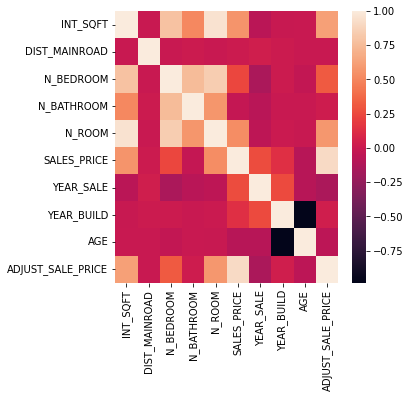

In [191]:
correlation = df12.corr()
print(correlation)
x,y = plt.subplots(figsize = (5,5))
sns.heatmap(correlation)

In [192]:
correlation['ADJUST_SALE_PRICE']

INT_SQFT             0.617412
DIST_MAINROAD       -0.003389
N_BEDROOM            0.312500
N_BATHROOM           0.018051
N_ROOM               0.578646
SALES_PRICE          0.911526
YEAR_SALE           -0.147394
YEAR_BUILD           0.035978
AGE                 -0.063020
ADJUST_SALE_PRICE    1.000000
Name: ADJUST_SALE_PRICE, dtype: float64

In [193]:
# High correlation indicates a linear relationship and a low correlation indicates a lesser linear relationship
# Here high correlation is present in INT_SQFT, N_ROOM, 

In [195]:
curr_var = [fig for fig in df12 if fig not in ['PRT_ID']]
target_variable = df12['ADJUST_SALE_PRICE']

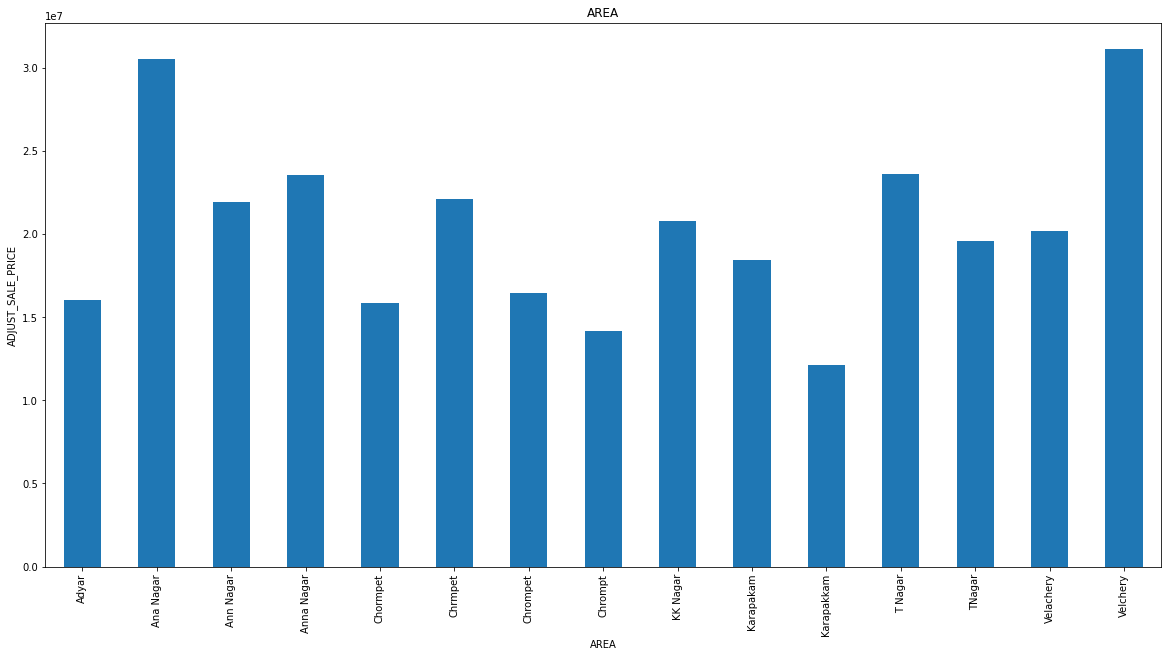

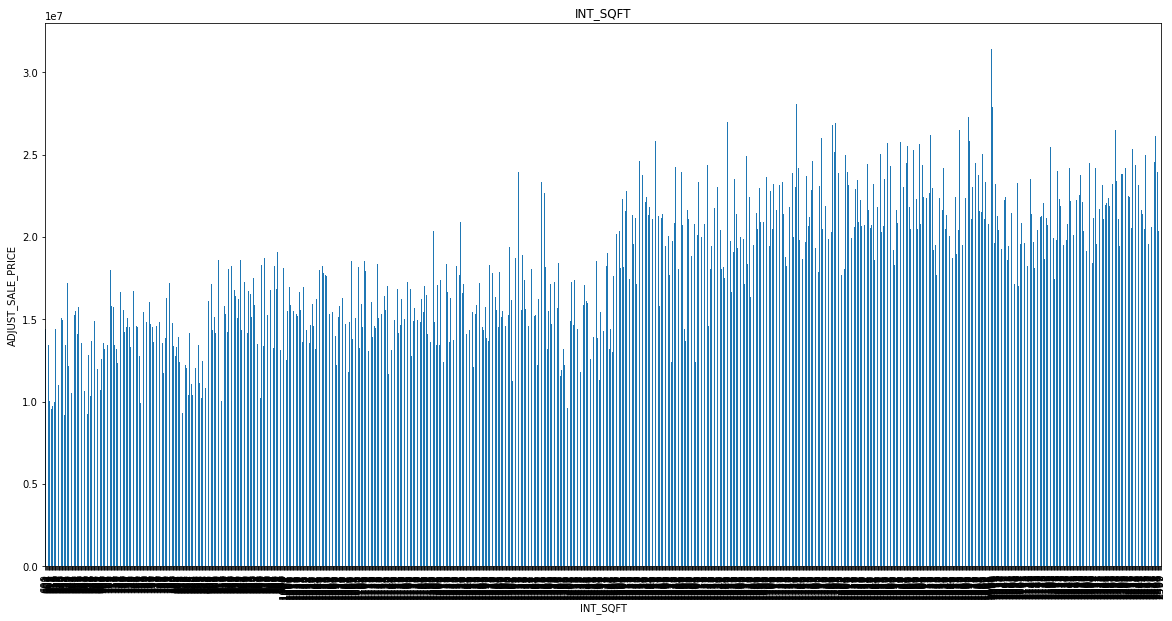

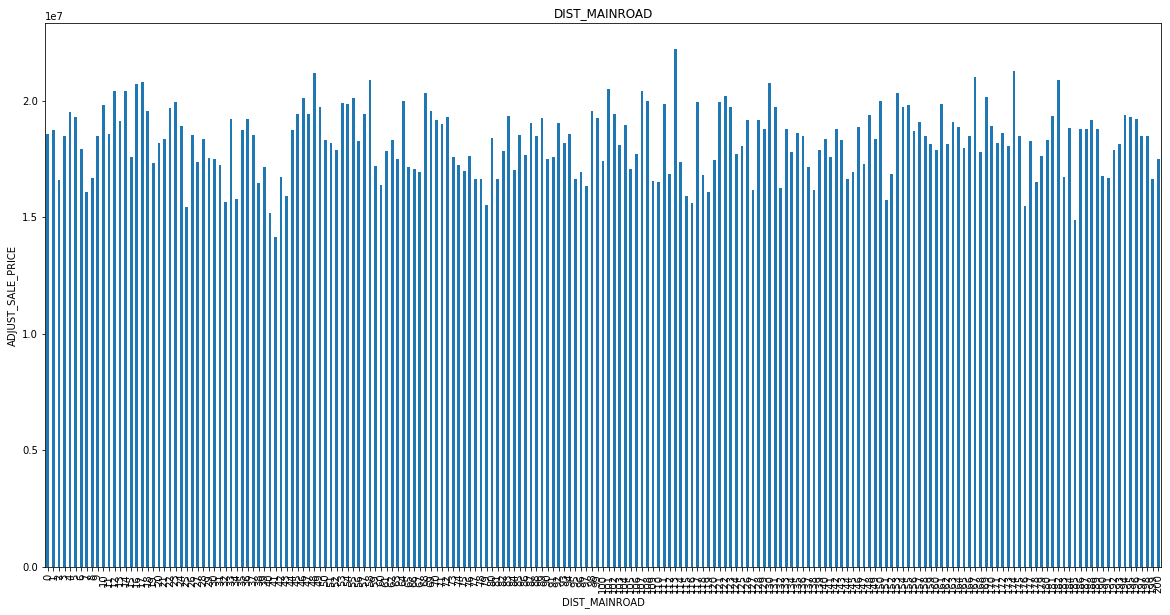

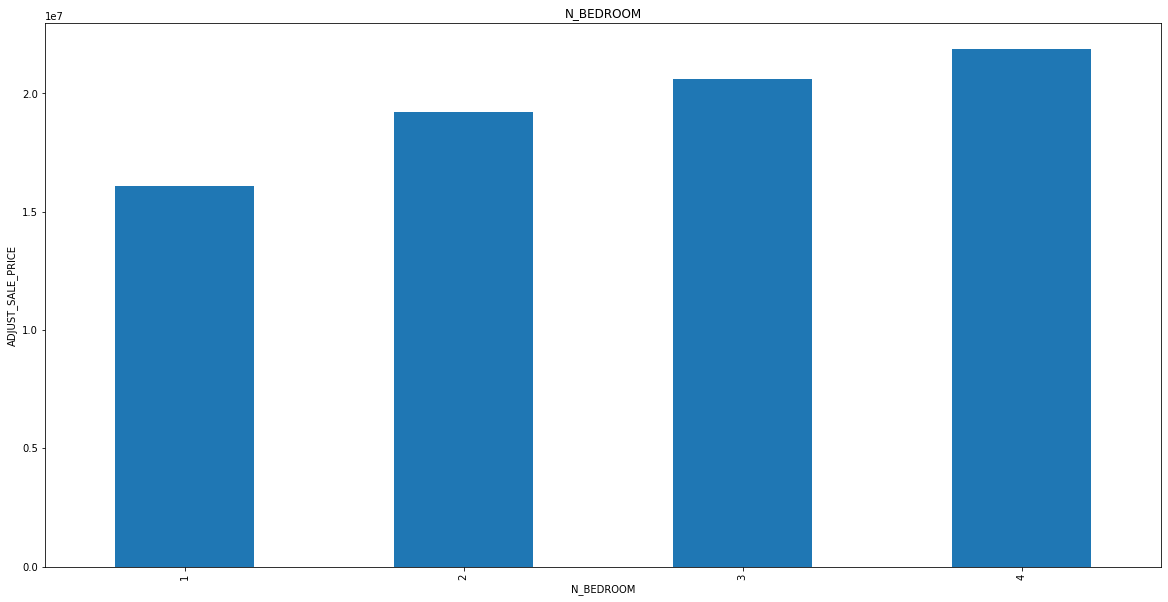

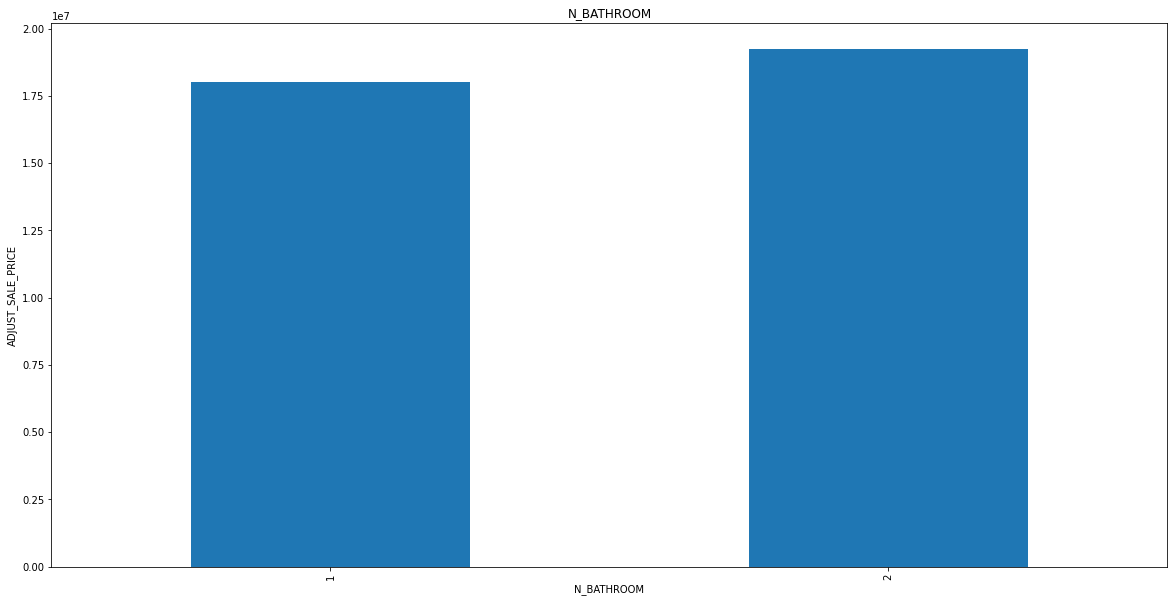

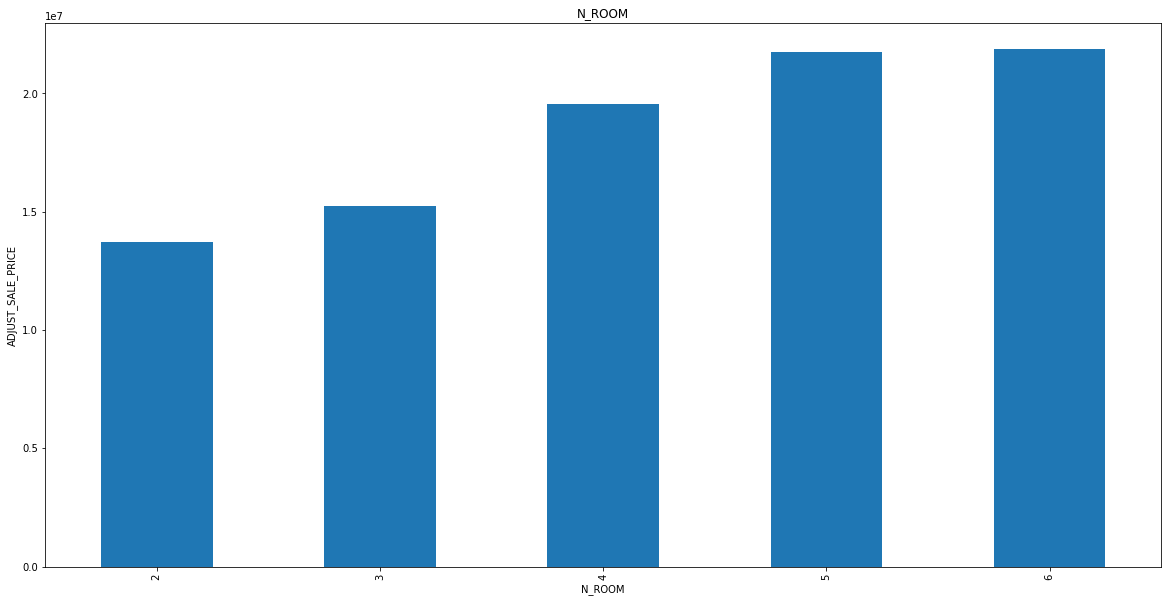

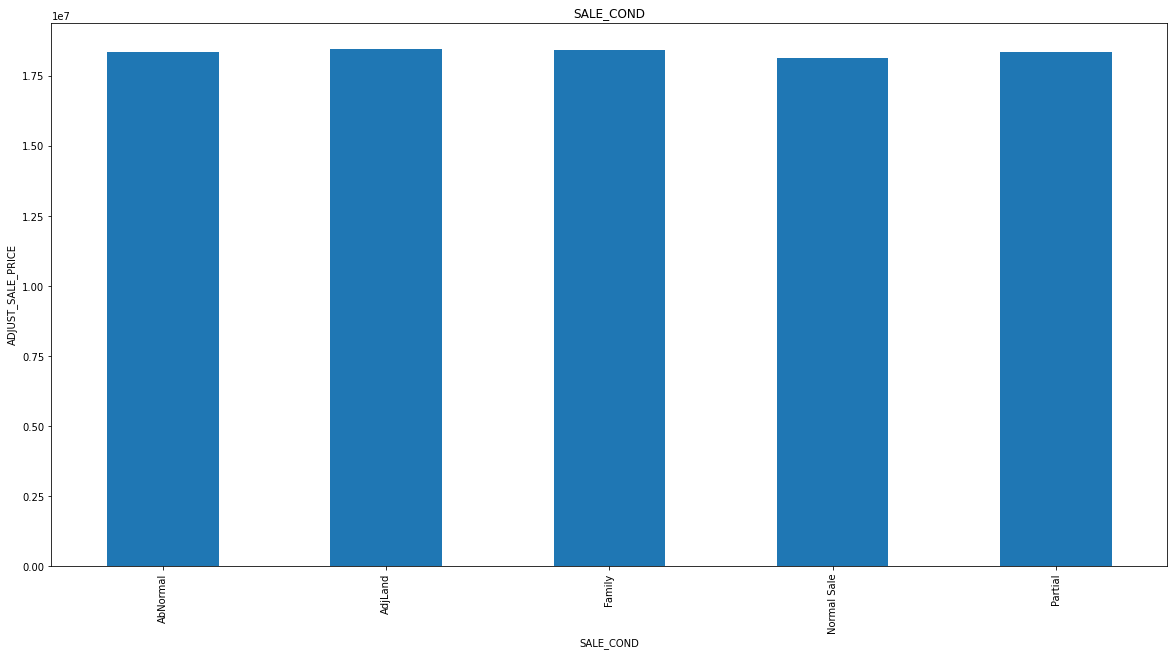

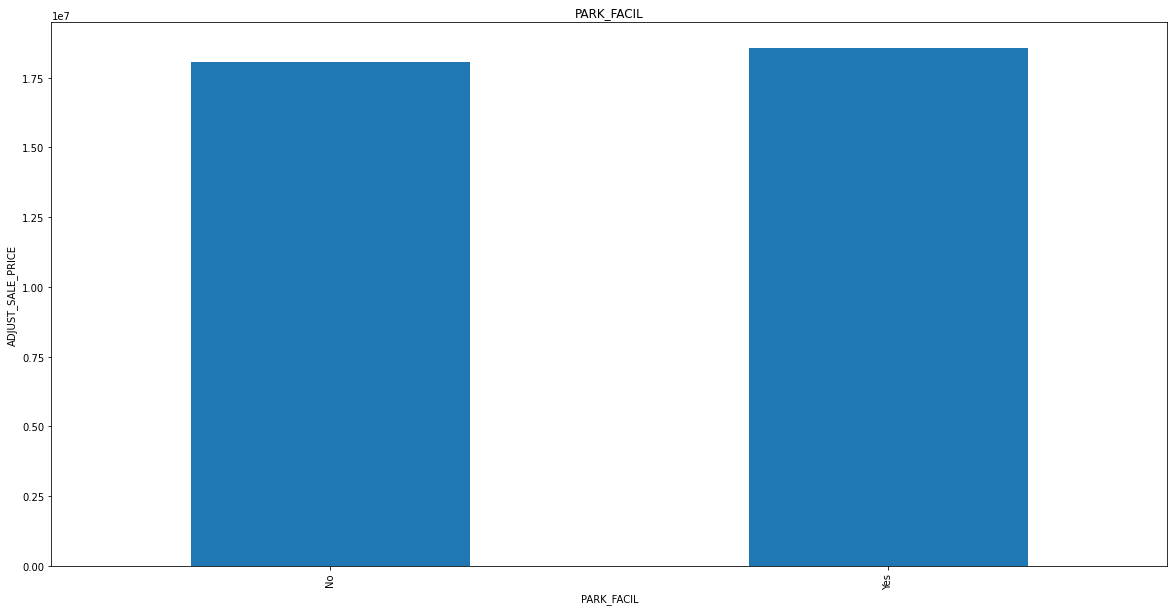

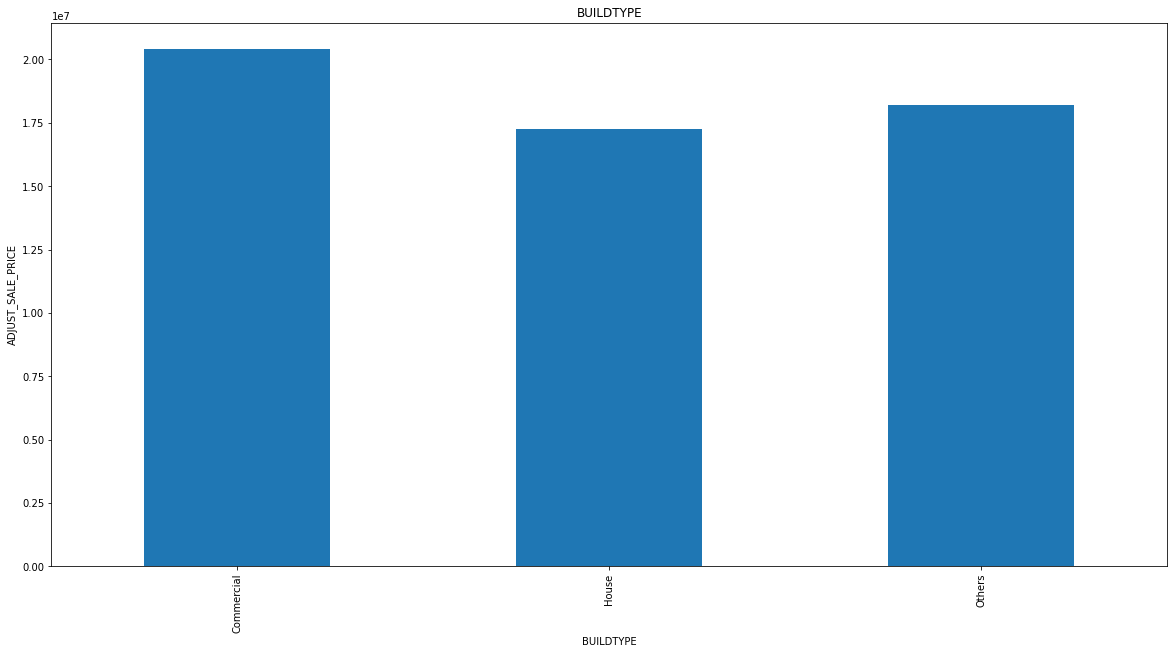

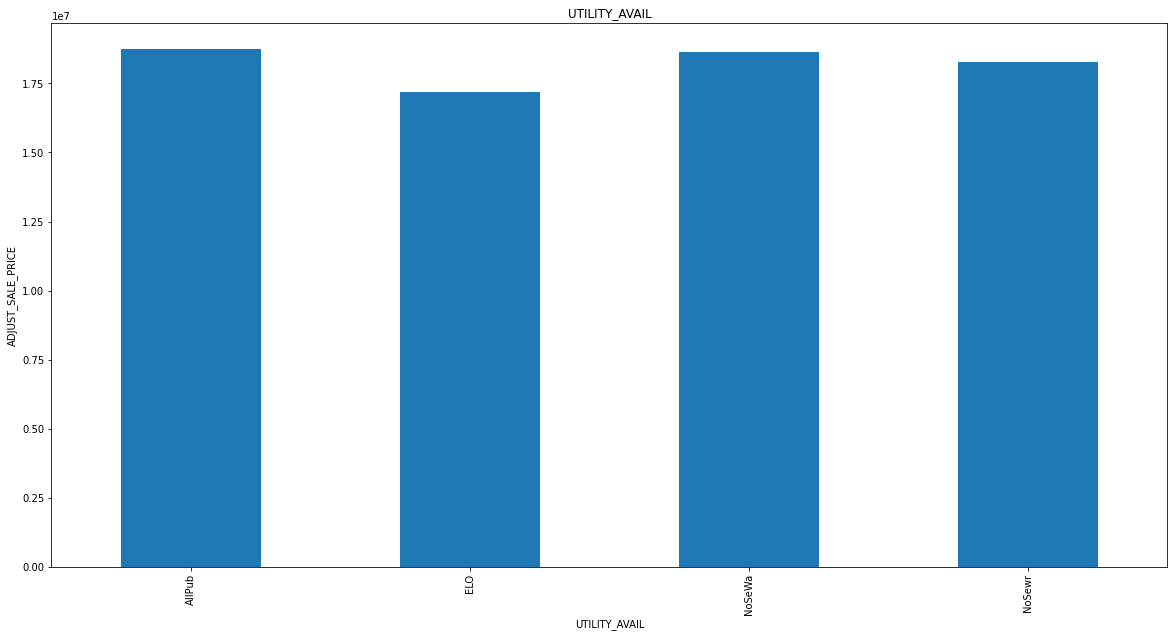

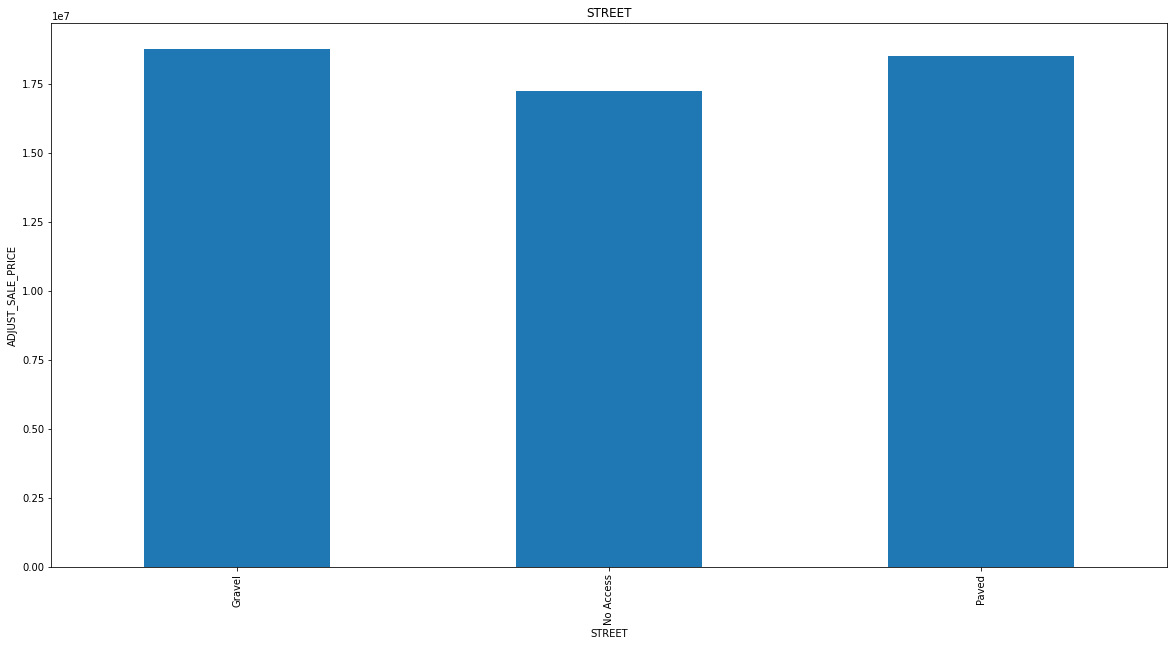

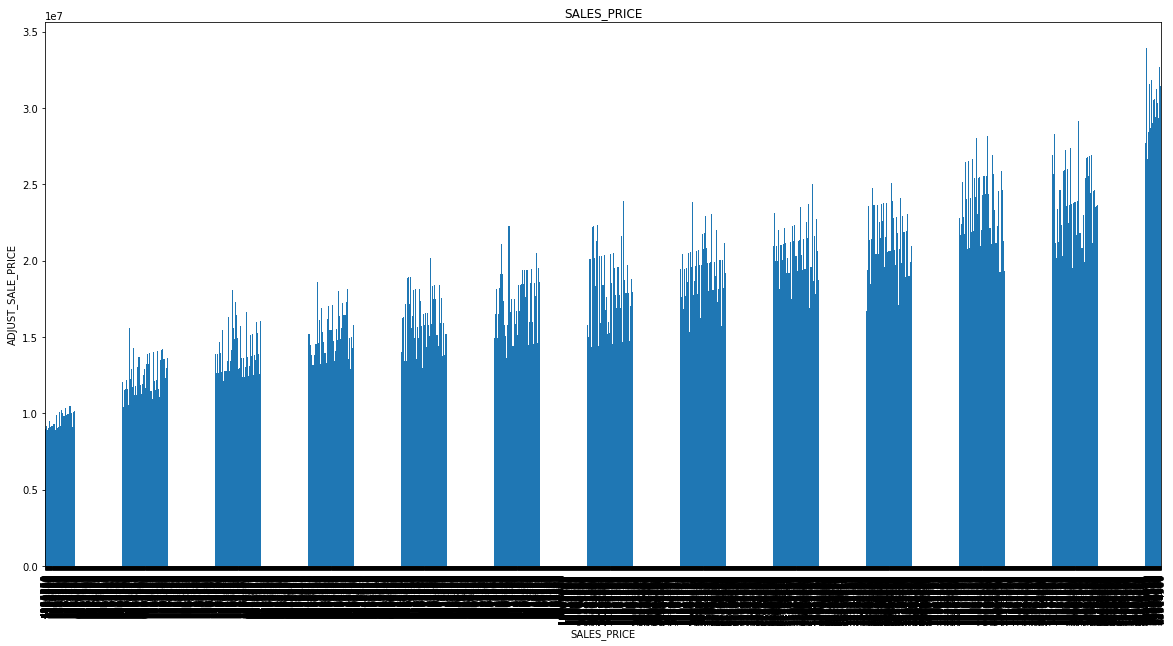

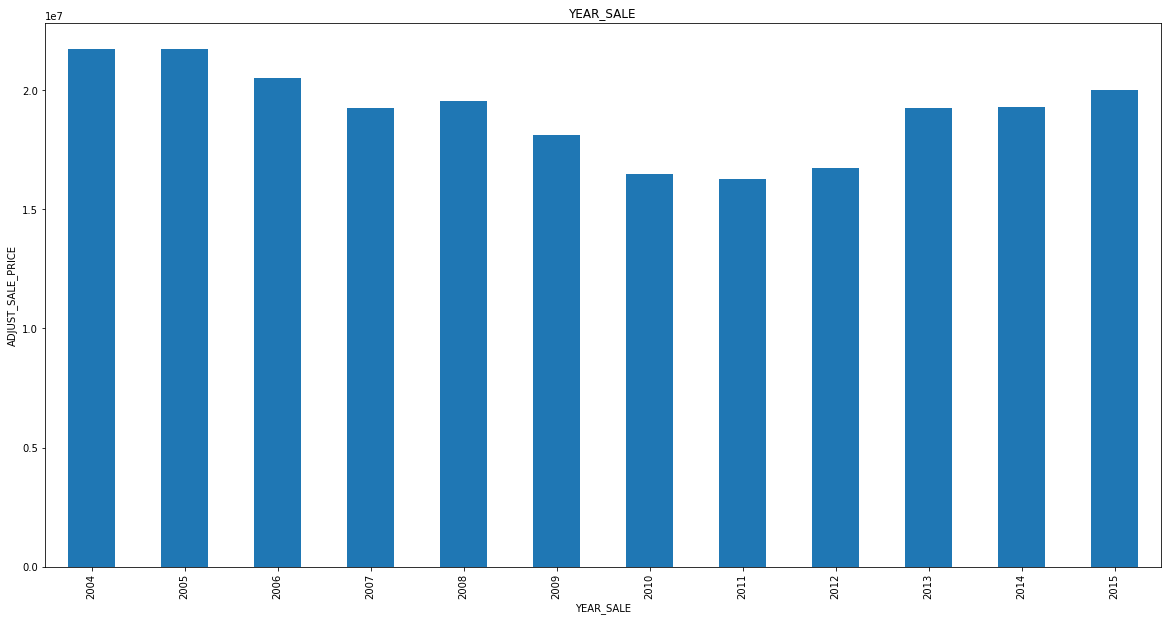

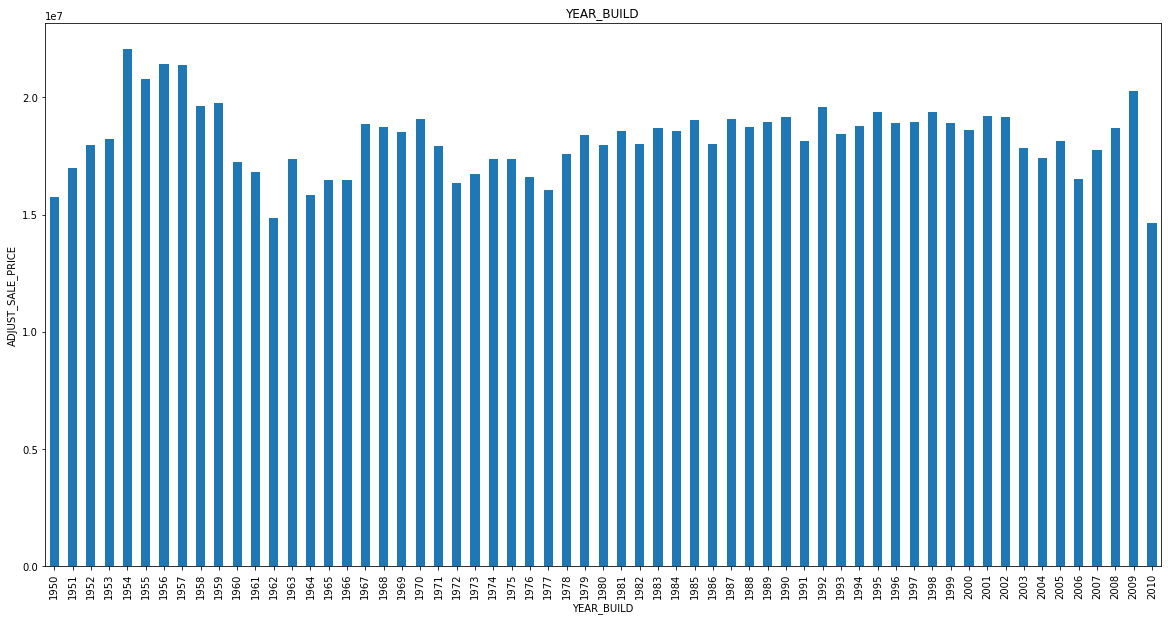

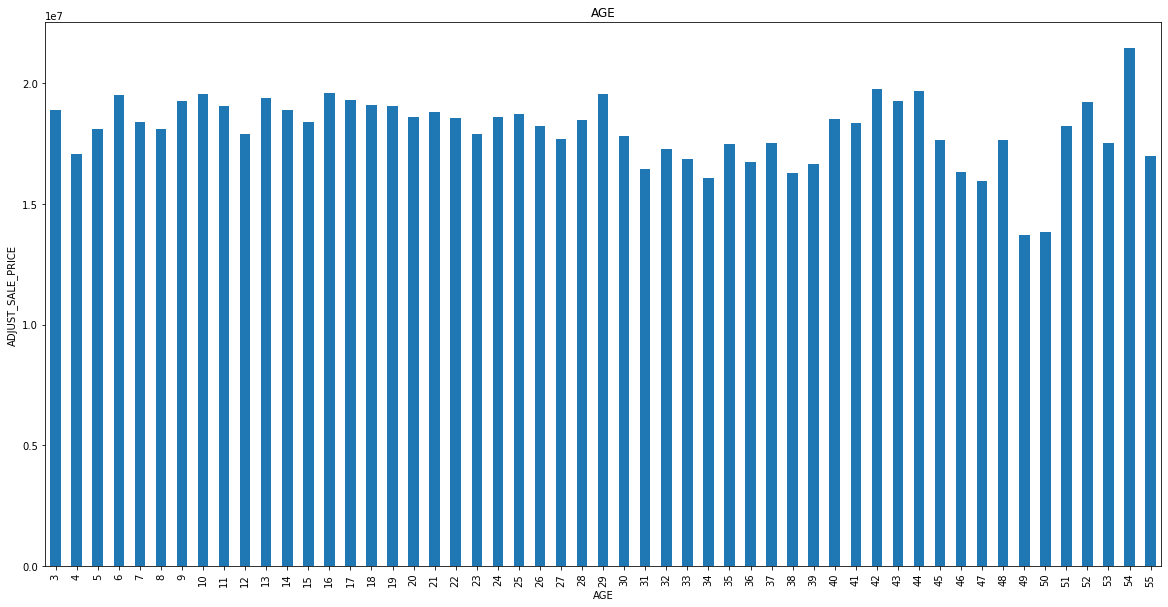

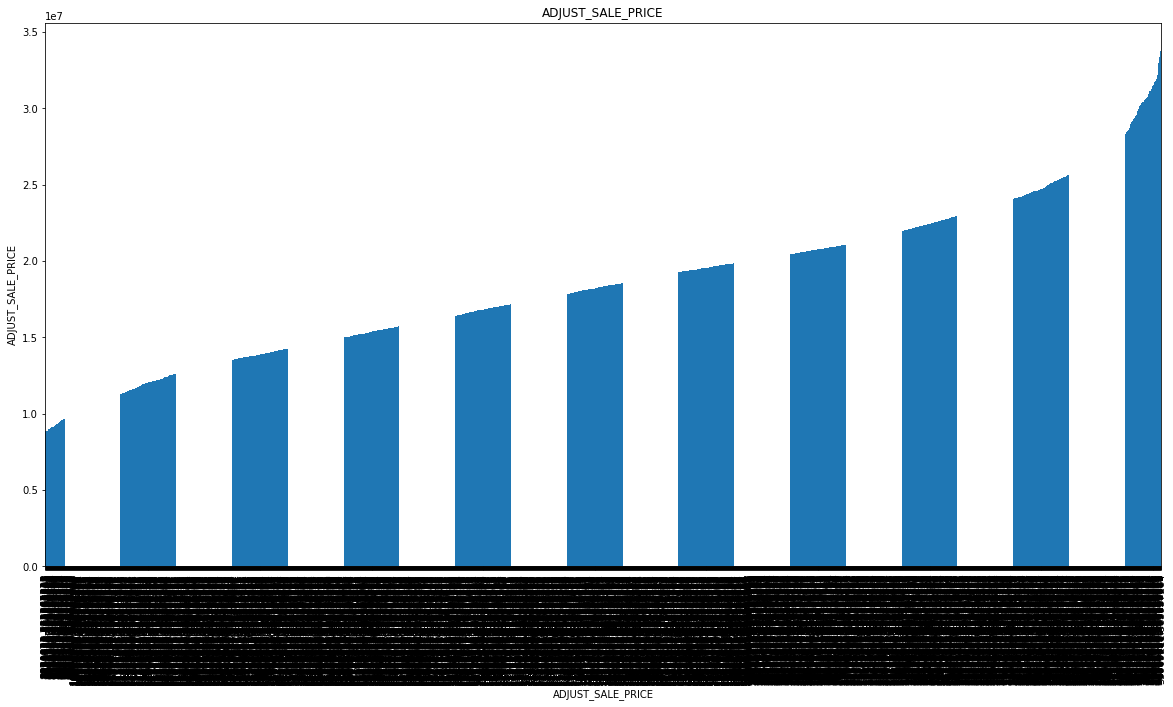

In [197]:
for feature in curr_var:
    dg1 = df12.copy()
    dg1.groupby(feature)['ADJUST_SALE_PRICE'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('ADJUST_SALE_PRICE')
    plt.title(feature)
    plt.show()

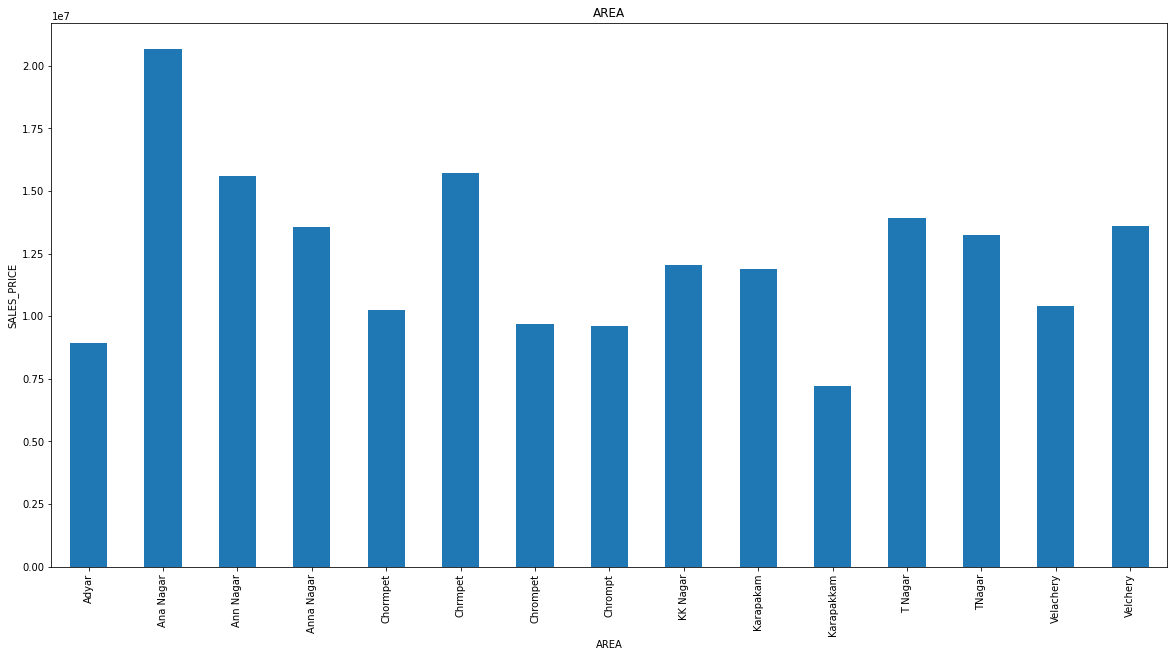

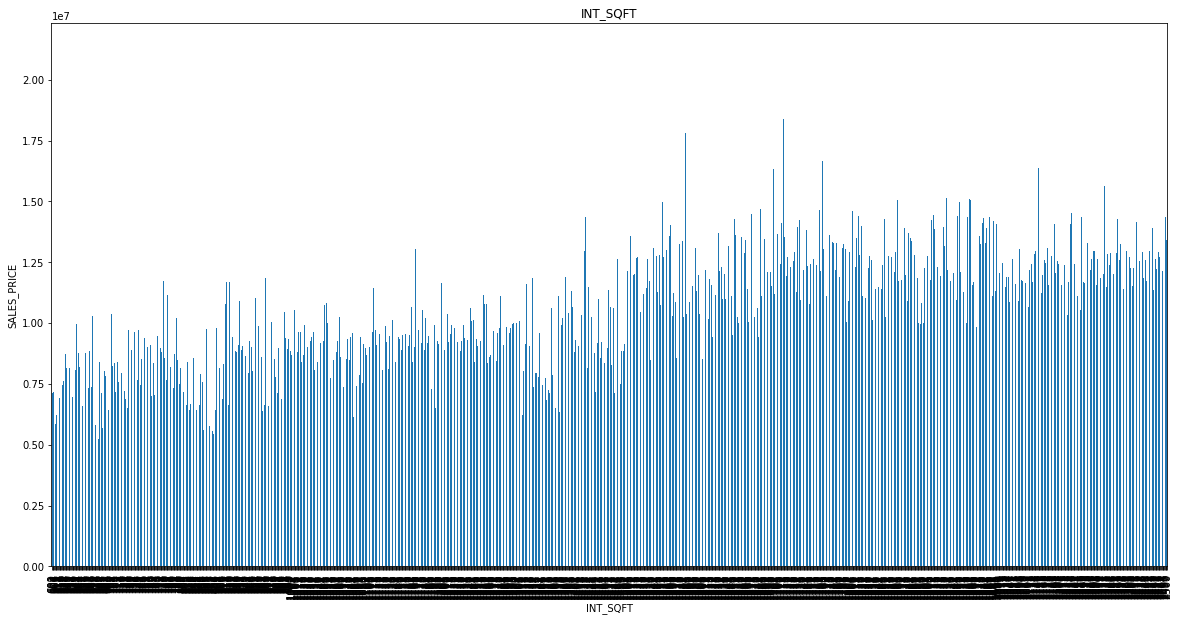

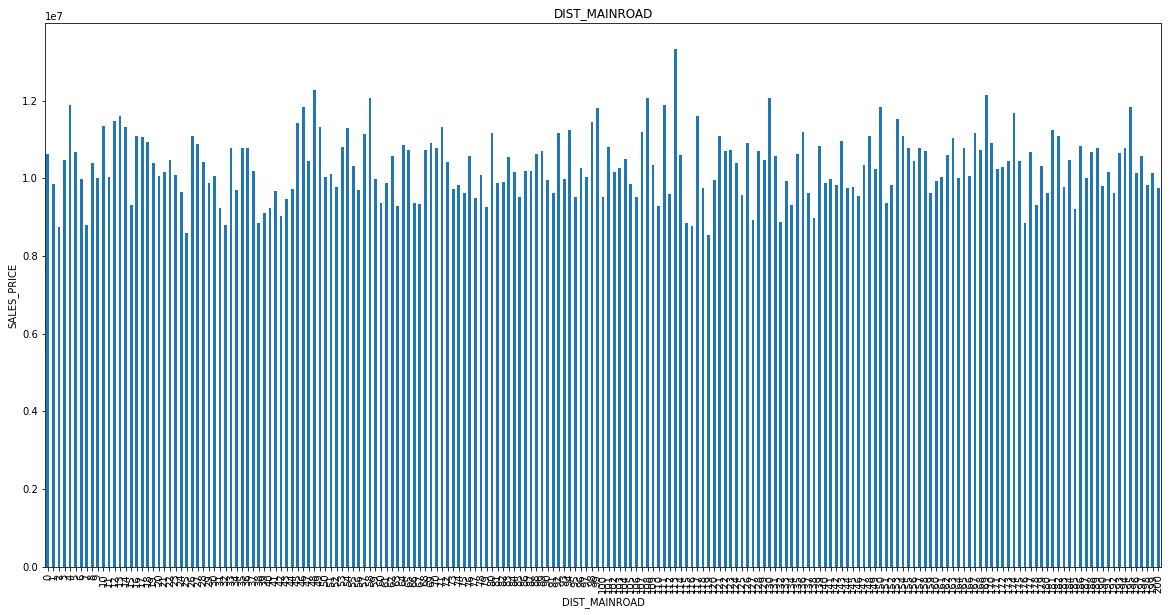

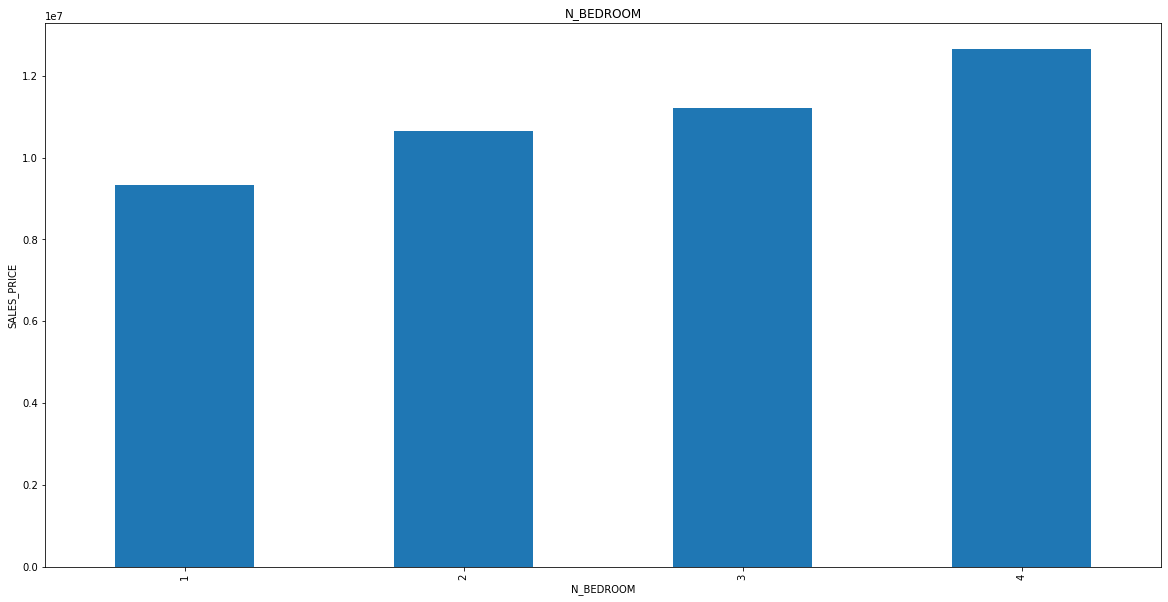

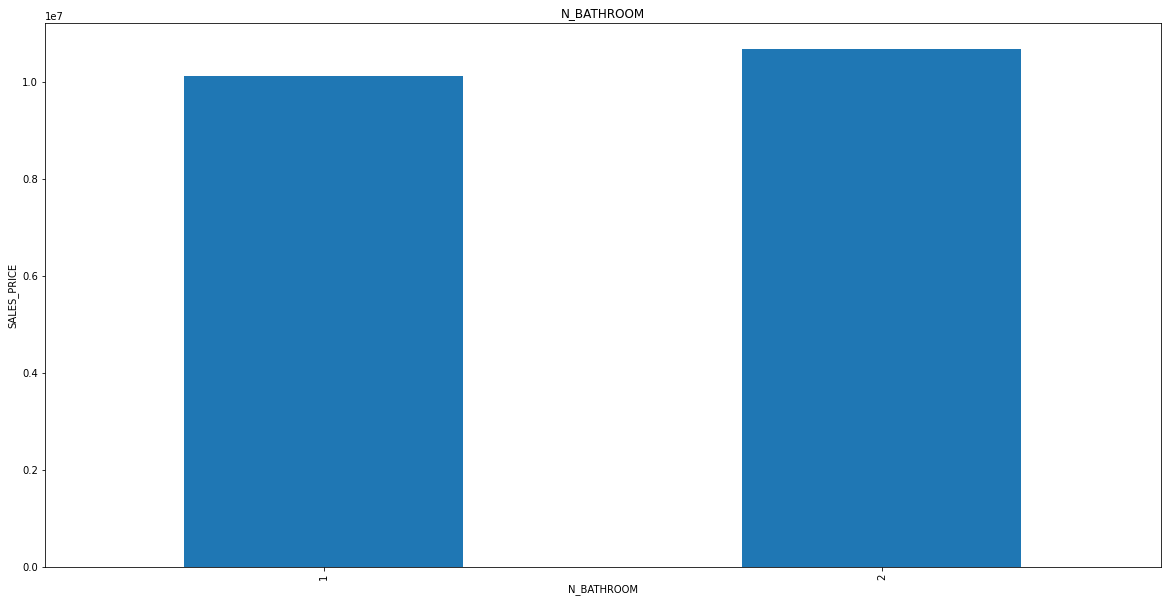

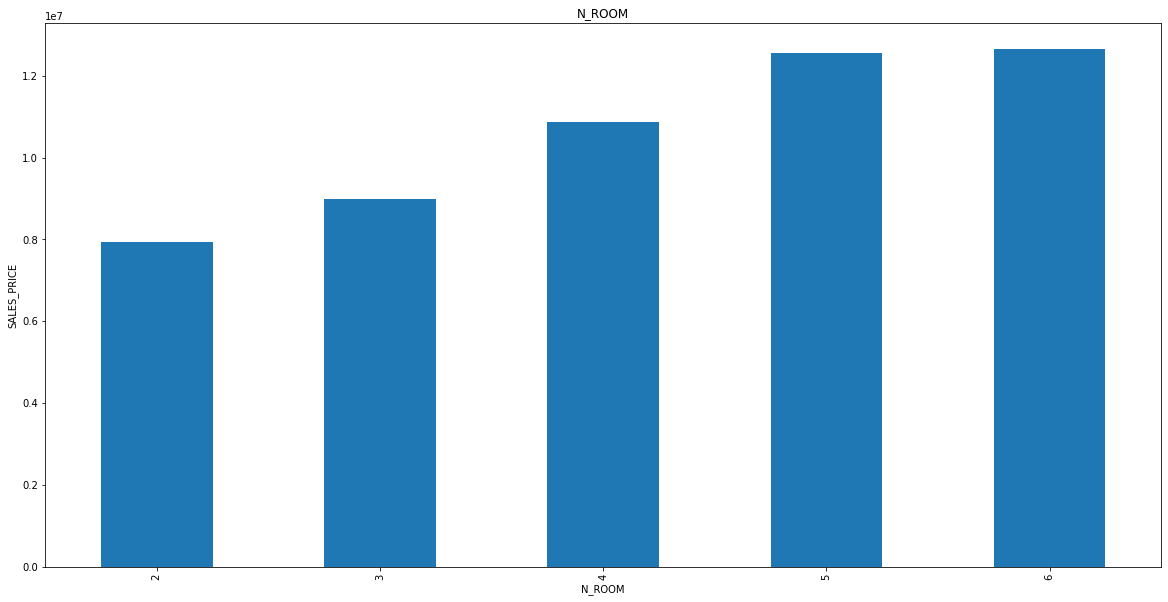

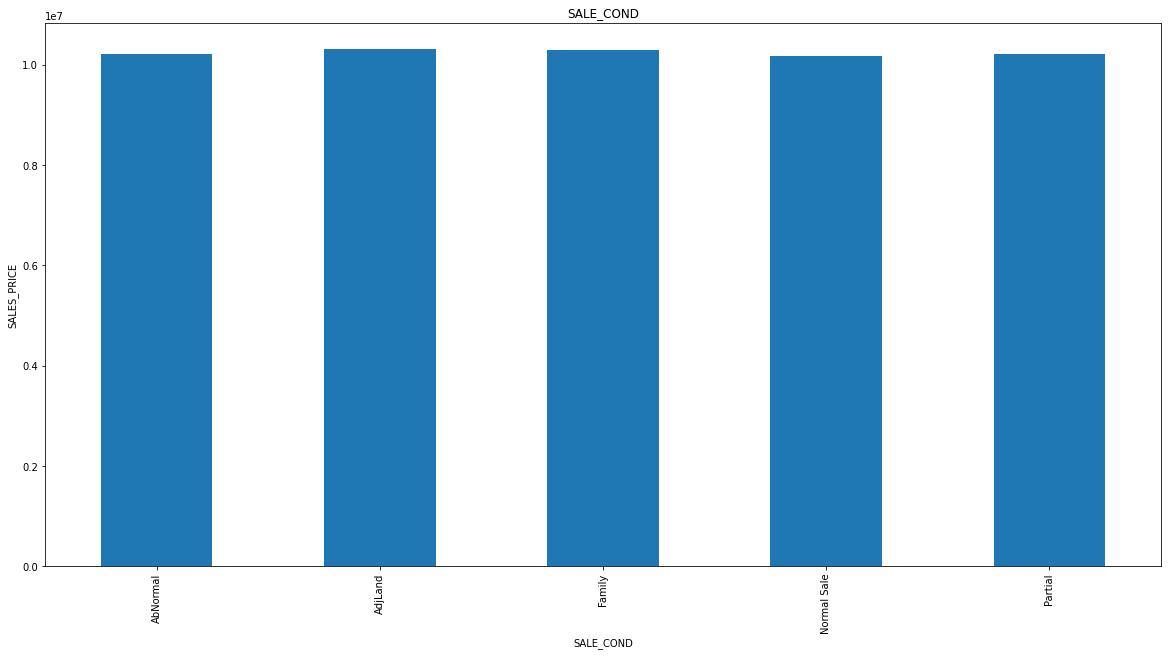

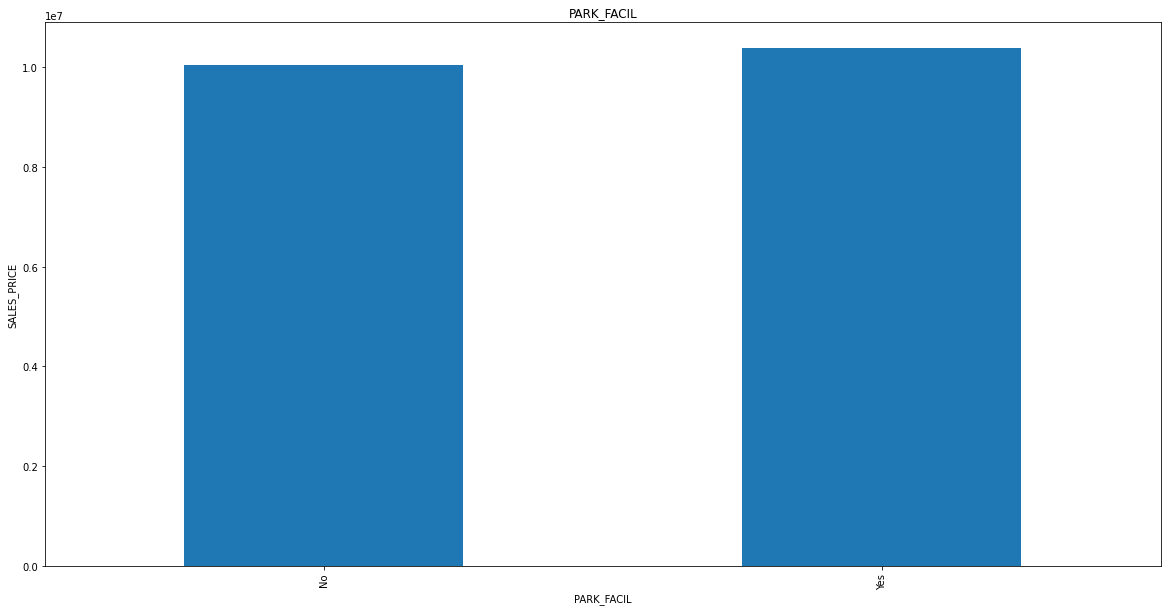

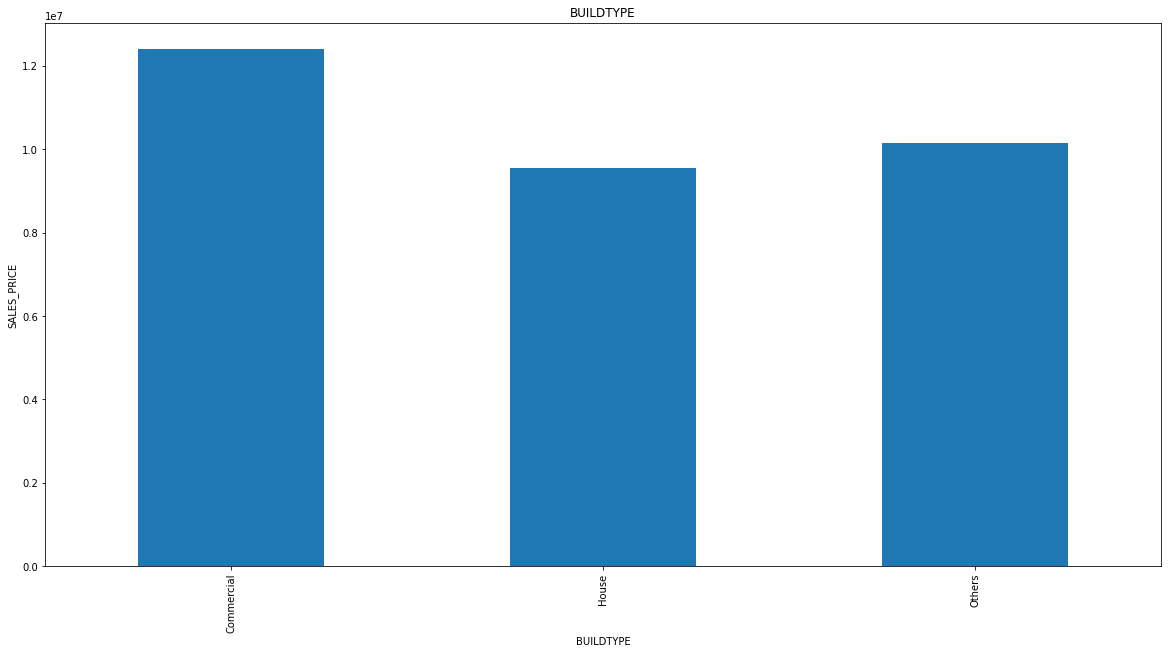

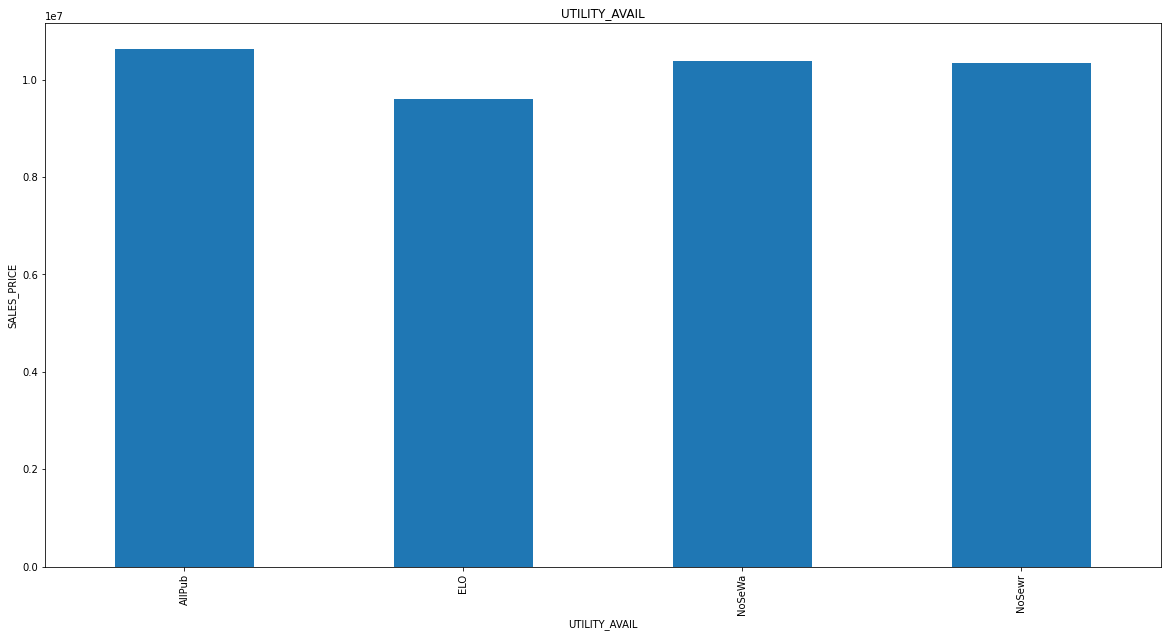

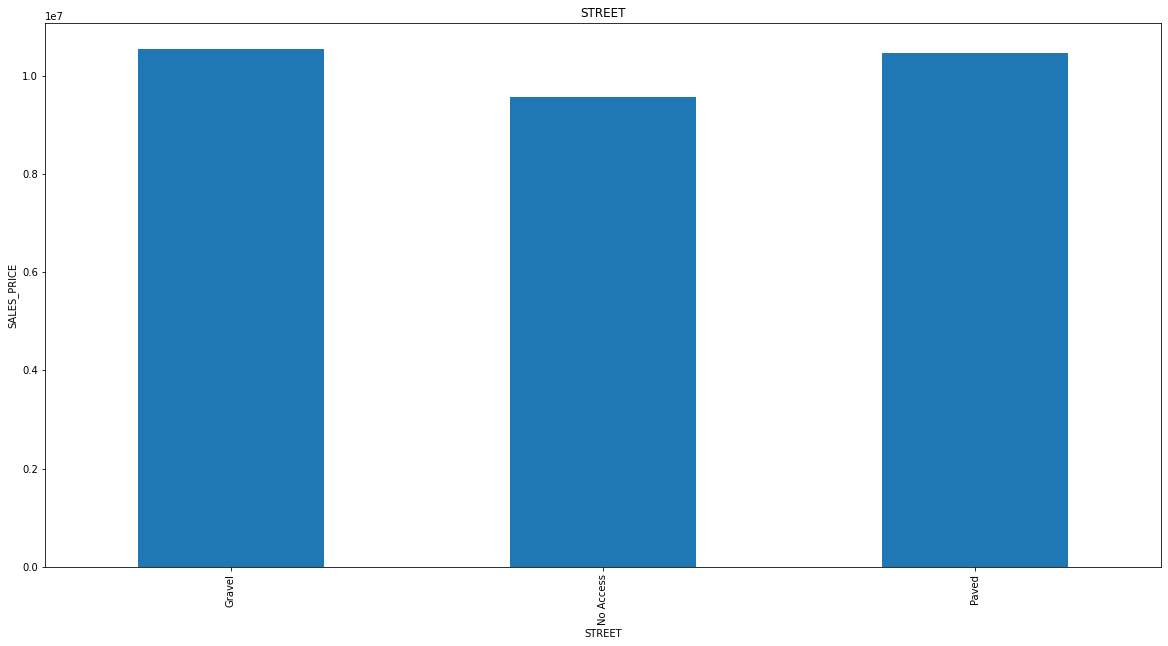

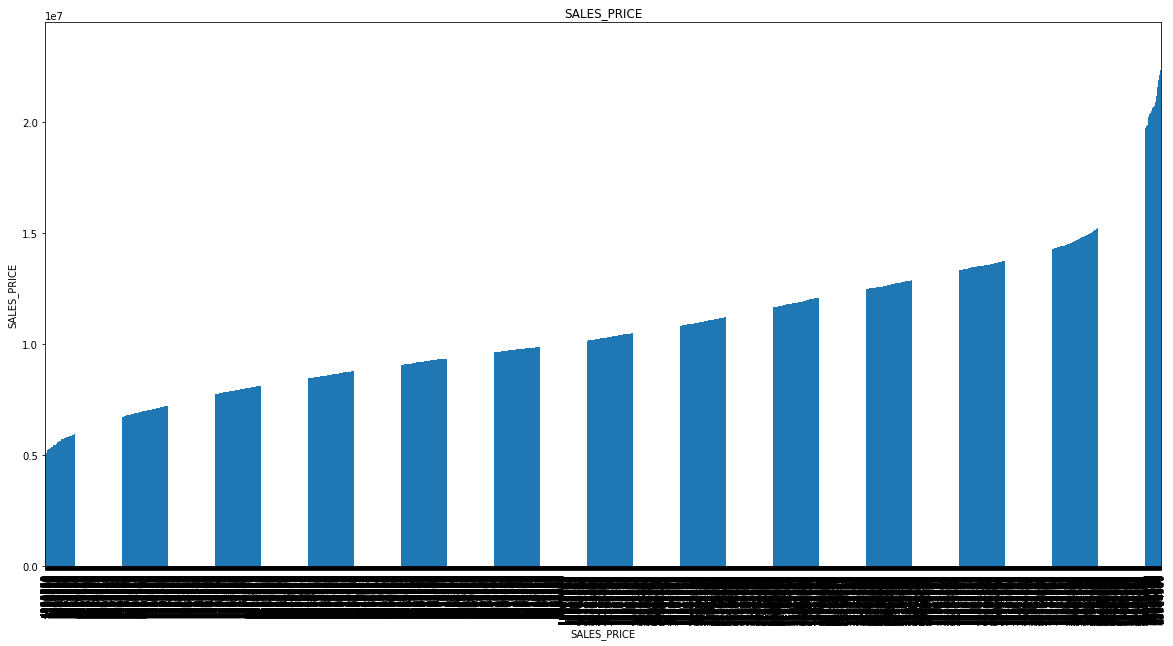

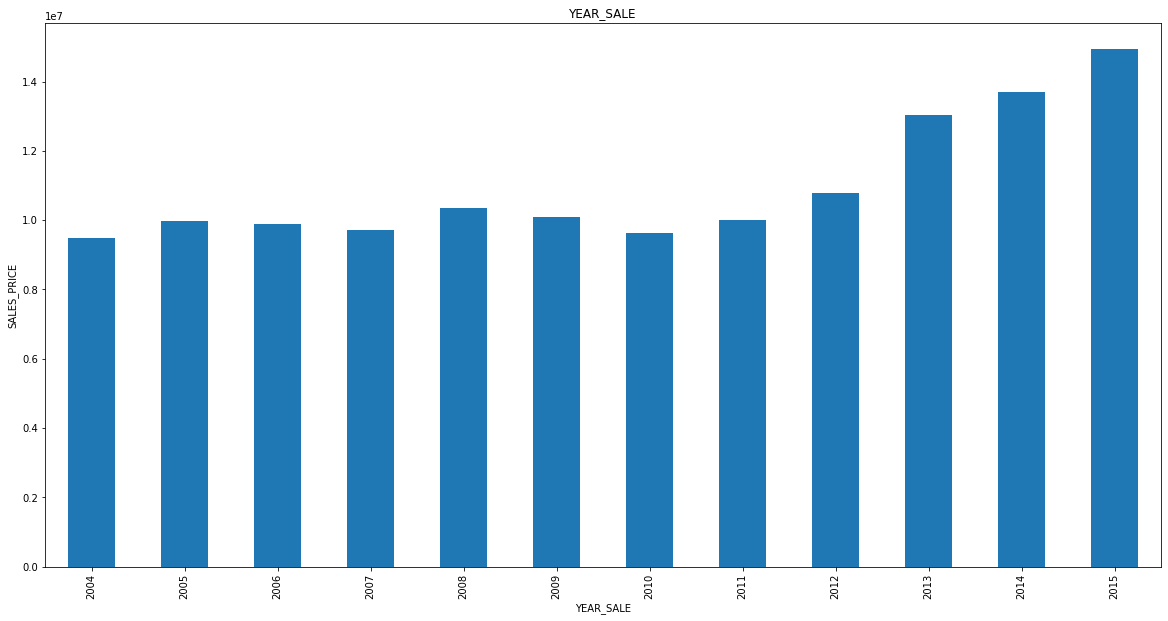

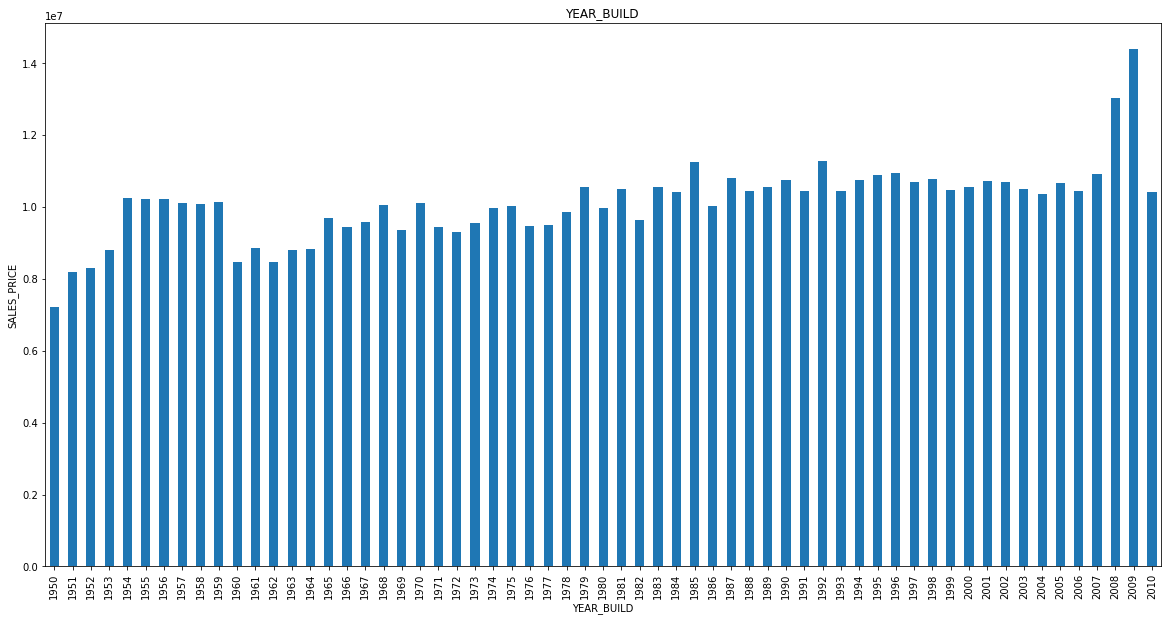

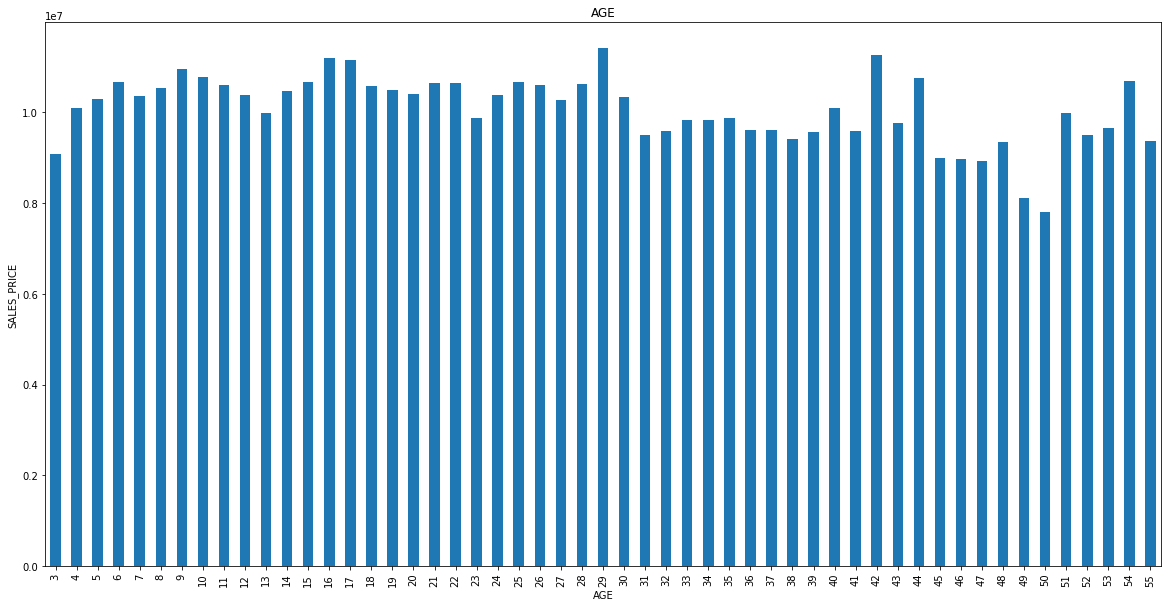

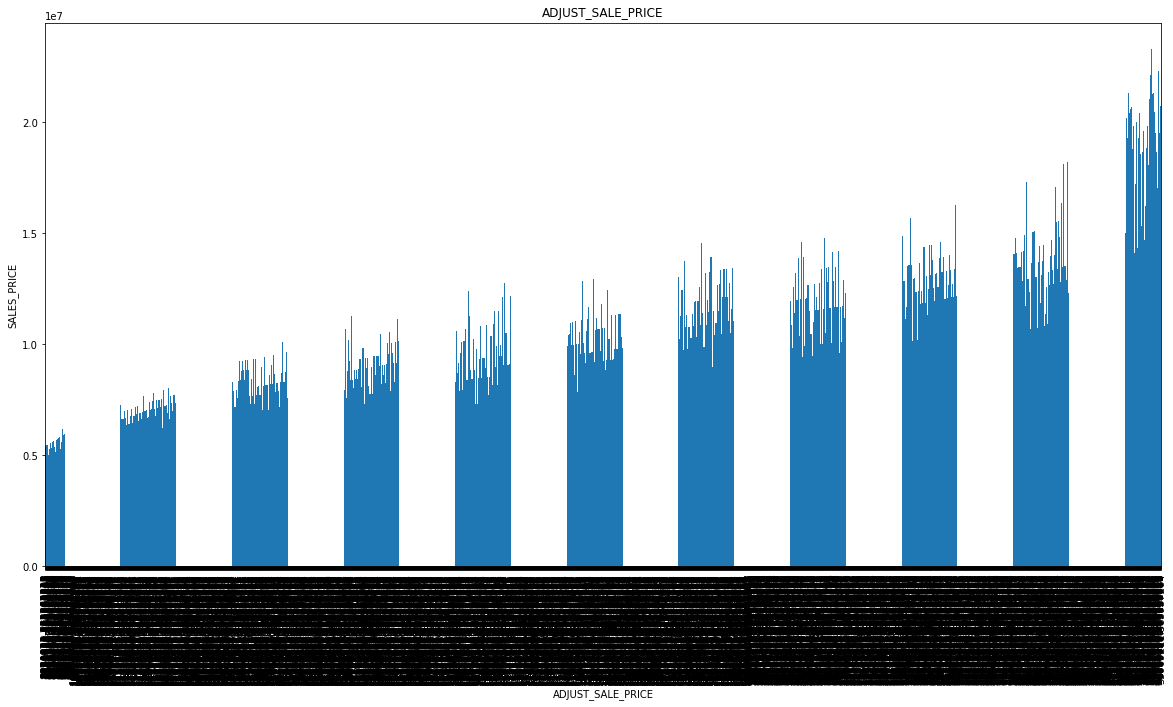

In [198]:
for feature in curr_var:
    dg1 = df12.copy()
    dg1.groupby(feature)['SALES_PRICE'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SALES_PRICE')
    plt.title(feature)
    plt.show()

<AxesSubplot:xlabel='N_BEDROOM', ylabel='ADJUST_SALE_PRICE'>

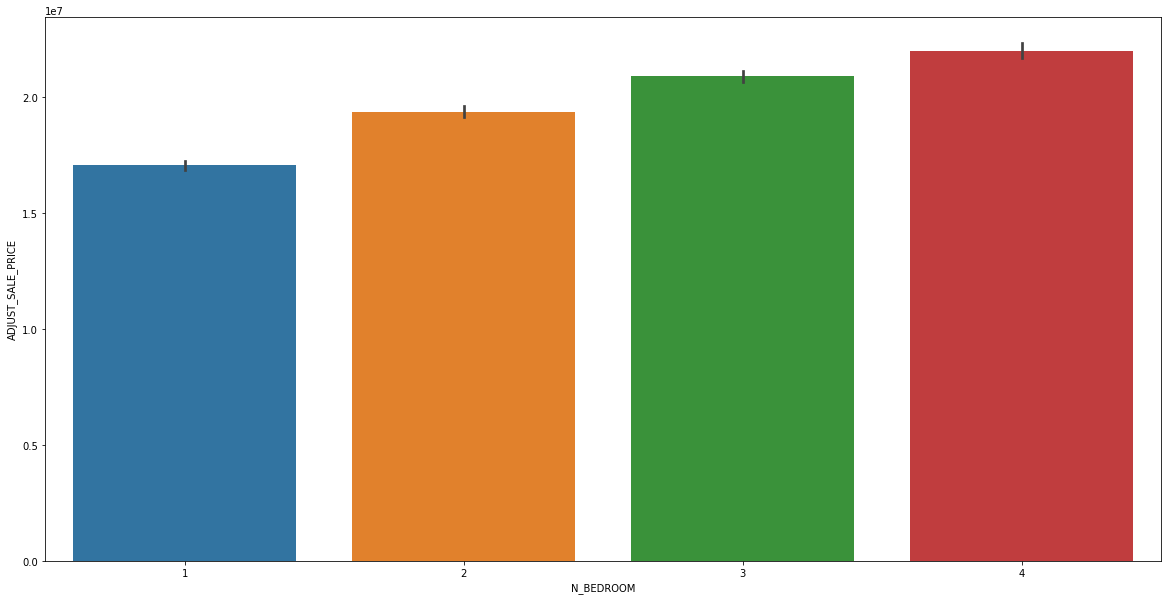

In [200]:
sns.barplot(x = 'N_BEDROOM', y = 'ADJUST_SALE_PRICE', data = df12)

<AxesSubplot:xlabel='N_ROOM', ylabel='ADJUST_SALE_PRICE'>

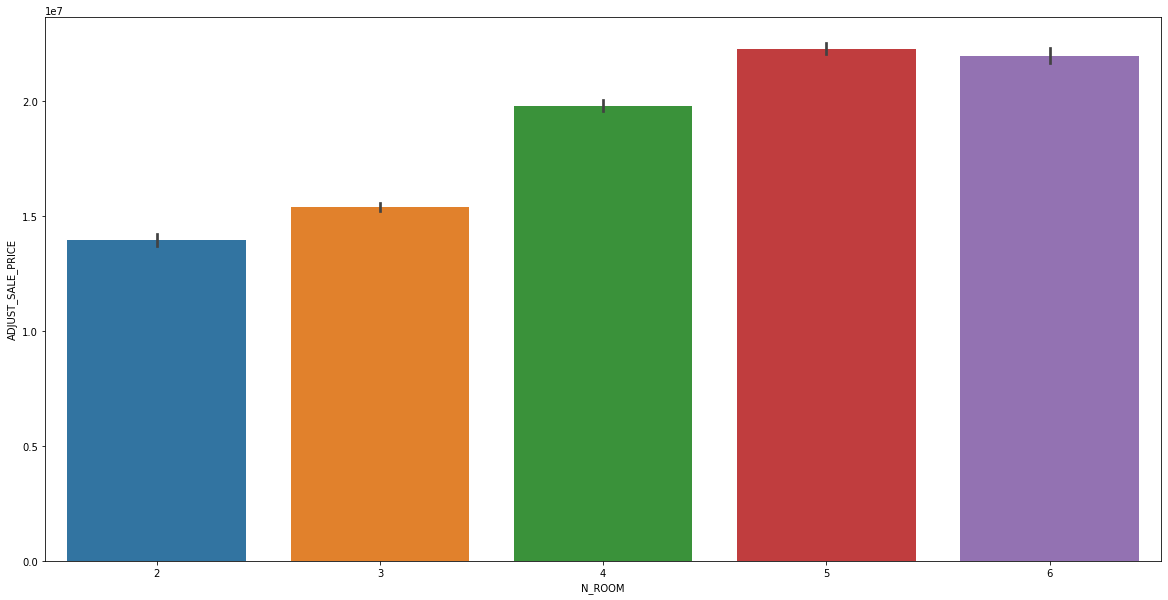

In [203]:
sns.barplot(x = 'N_ROOM', y = 'ADJUST_SALE_PRICE', data = df12)

C:\Users\ajaym\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YEAR_SALE', ylabel='ADJUST_SALE_PRICE'>

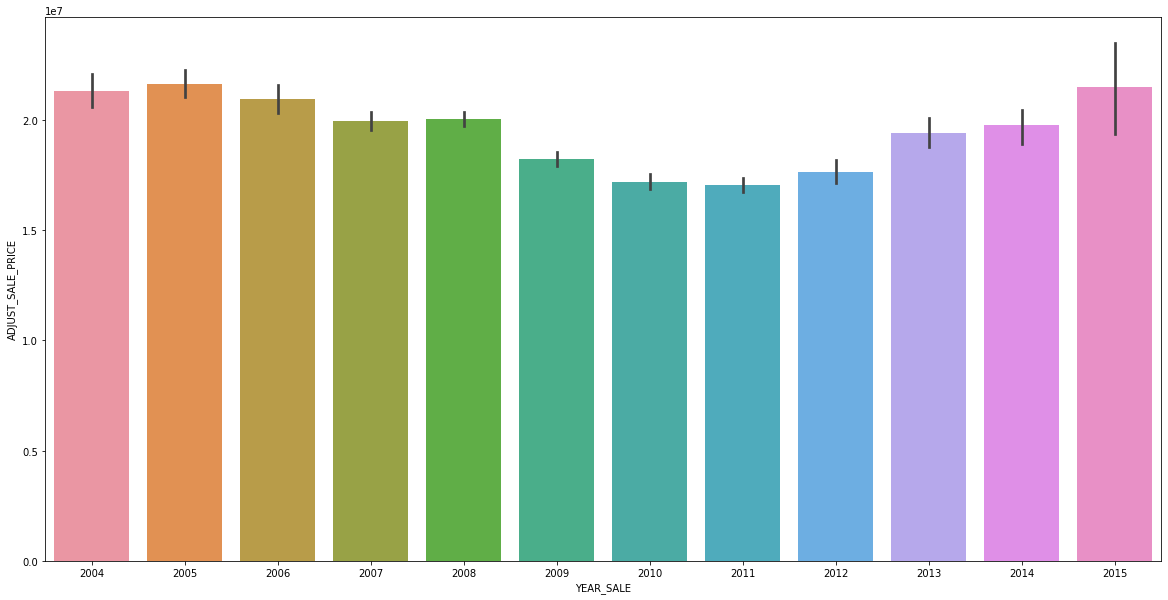

In [202]:
sns.barplot(df12['YEAR_SALE'], y = df12['ADJUST_SALE_PRICE'])

C:\Users\ajaym\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YEAR_SALE', ylabel='SALES_PRICE'>

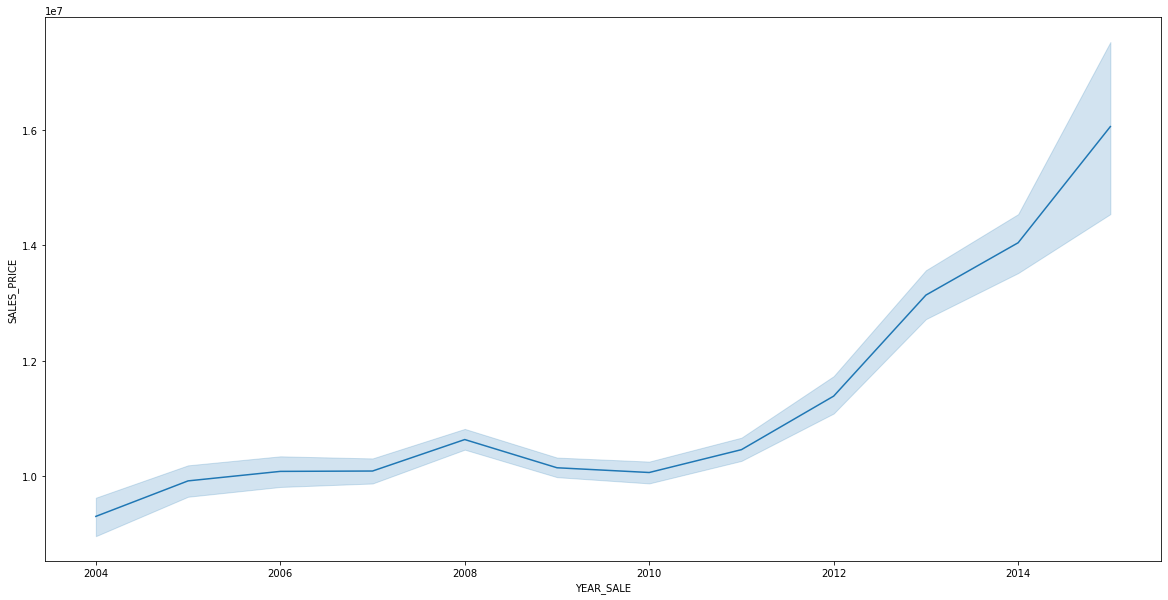

In [205]:
sns.lineplot(df12["YEAR_SALE"], df12["SALES_PRICE"])

C:\Users\ajaym\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YEAR_SALE', ylabel='ADJUST_SALE_PRICE'>

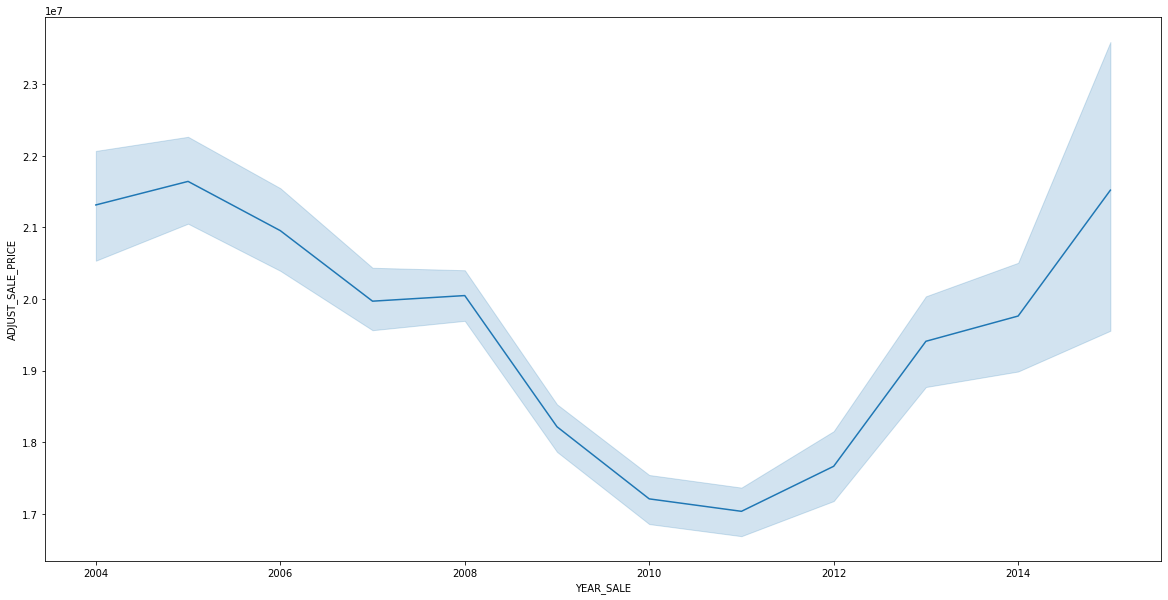

In [206]:
sns.lineplot(df12["YEAR_SALE"], df12["ADJUST_SALE_PRICE"])

C:\Users\ajaym\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='INT_SQFT', ylabel='ADJUST_SALE_PRICE'>

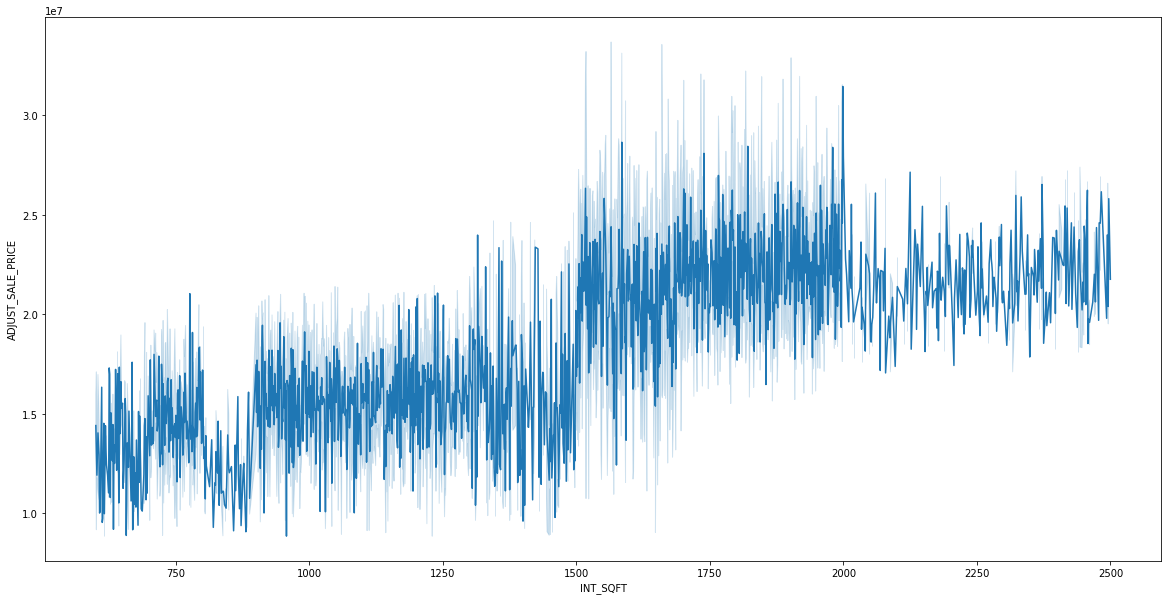

In [207]:
sns.lineplot(df12.INT_SQFT, df12.ADJUST_SALE_PRICE)

### Model Building

One Hot Encoding 

In [208]:
dummies = pd.get_dummies(df12.AREA)
dummies.head()

,Adyar,Ana Nagar,Ann Nagar,Anna Nagar,Chormpet,Chrmpet,Chrompet,Chrompt,KK Nagar,Karapakam,Karapakkam,T Nagar,TNagar,Velachery,Velchery
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [209]:
df12.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,SALES_PRICE,YEAR_SALE,YEAR_BUILD,AGE,ADJUST_SALE_PRICE
0,P01812,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,13159200,2012,1992,20,2.041424e+07
1,P09370,Adyar,1056,83,1,1,3,Partial,Yes,Others,NoSewr,Paved,9386490,2007,1981,26,1.858461e+07
2,P08160,Adyar,1136,69,1,1,3,Normal Sale,Yes,Others,AllPub,Paved,8287550,2008,1978,30,1.562741e+07
3,P02677,Adyar,730,185,1,1,2,AdjLand,Yes,House,ELO,Gravel,8848285,2011,1972,39,1.441292e+07
4,P07194,Adyar,904,52,1,1,3,AdjLand,No,Commercial,ELO,No Access,11601400,2009,1969,40,2.083445e+07


In [210]:
dummies1 = pd.get_dummies(df12.SALE_COND)

dummies2 = pd.get_dummies(df12.PARK_FACIL)


dummies3 = pd.get_dummies(df12.BUILDTYPE)


dummies4 = pd.get_dummies(df12.UTILITY_AVAIL)


dummies5 = pd.get_dummies(df12.STREET)


In [211]:
df13 = pd.concat([df12, dummies, dummies1,dummies2, dummies3, dummies4, dummies5 ], axis = 'columns')
df13.head(-50)

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,...,Commercial,House,Others,AllPub,ELO,NoSeWa,NoSewr,Gravel,No Access,Paved
0,P01812,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,...,1,0,0,0,1,0,0,1,0,0
1,P09370,Adyar,1056,83,1,1,3,Partial,Yes,Others,...,0,0,1,0,0,0,1,0,0,1
2,P08160,Adyar,1136,69,1,1,3,Normal Sale,Yes,Others,...,0,0,1,1,0,0,0,0,0,1
3,P02677,Adyar,730,185,1,1,2,AdjLand,Yes,House,...,0,1,0,0,1,0,0,1,0,0
4,P07194,Adyar,904,52,1,1,3,AdjLand,No,Commercial,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4423,P09909,Velachery,1737,175,2,1,4,Partial,No,House,...,0,1,0,0,0,1,0,1,0,0
4424,P09708,Velachery,1831,64,3,2,5,Partial,Yes,House,...,0,1,0,0,1,0,0,1,0,0
4425,P08253,Velachery,1769,50,2,1,4,AbNormal,Yes,House,...,0,1,0,0,1,0,0,1,0,0
4426,P09863,Velachery,1941,85,3,2,5,AbNormal,Yes,House,...,0,1,0,0,1,0,0,0,1,0


In [212]:
df13 = df13.drop(['AREA', 'SALE_COND', 'PARK_FACIL','UTILITY_AVAIL', 'BUILDTYPE','STREET'], axis = 1)

In [213]:
df13.head()

,PRT_ID,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALES_PRICE,YEAR_SALE,YEAR_BUILD,AGE,...,Commercial,House,Others,AllPub,ELO,NoSeWa,NoSewr,Gravel,No Access,Paved
0,P01812,909,70,1,1,3,13159200,2012,1992,20,...,1,0,0,0,1,0,0,1,0,0
1,P09370,1056,83,1,1,3,9386490,2007,1981,26,...,0,0,1,0,0,0,1,0,0,1
2,P08160,1136,69,1,1,3,8287550,2008,1978,30,...,0,0,1,1,0,0,0,0,0,1
3,P02677,730,185,1,1,2,8848285,2011,1972,39,...,0,1,0,0,1,0,0,1,0,0
4,P07194,904,52,1,1,3,11601400,2009,1969,40,...,1,0,0,0,1,0,0,0,1,0


In [214]:
df13.shape

(4478, 43)

In [264]:
df14 = df13.drop(['PRT_ID','DIST_MAINROAD','YEAR_SALE','YEAR_BUILD','AGE'], axis = 1)

In [265]:
df14.head()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALES_PRICE,ADJUST_SALE_PRICE,Adyar,Ana Nagar,Ann Nagar,Anna Nagar,...,Commercial,House,Others,AllPub,ELO,NoSeWa,NoSewr,Gravel,No Access,Paved
0,909,1,1,3,13159200,2.041424e+07,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1,1056,1,1,3,9386490,1.858461e+07,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,1136,1,1,3,8287550,1.562741e+07,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3,730,1,1,2,8848285,1.441292e+07,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,904,1,1,3,11601400,2.083445e+07,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [303]:
df14 = df14.drop(['SALES_PRICE'], axis = 1)

KeyError: "['SALES_PRICE'] not found in axis"

Splitting the Data

In [304]:
X = df14.copy()
X.head()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,ADJUST_SALE_PRICE,Adyar,Ana Nagar,Ann Nagar,Anna Nagar,Chormpet,...,Commercial,House,Others,AllPub,ELO,NoSeWa,NoSewr,Gravel,No Access,Paved
0,909,1,1,3,2.041424e+07,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1,1056,1,1,3,1.858461e+07,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,1136,1,1,3,1.562741e+07,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3,730,1,1,2,1.441292e+07,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,904,1,1,3,2.083445e+07,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [269]:
y = df13.ADJUST_SALE_PRICE
y.head()

0    2.041424e+07
1    1.858461e+07
2    1.562741e+07
3    1.441292e+07
4    2.083445e+07
Name: ADJUST_SALE_PRICE, dtype: float64

Train Test Split

In [270]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4,random_state = 101)

Scaling the data

In [271]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()

scaling.fit_transform(X_train, y_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

Linear Regression

In [272]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train_scaled, y_train)
lr_clf.score(X_test_scaled, y_test)

0.9999970584634792

In [273]:
print(lr_clf.intercept_)

18482896.336518005


In [274]:
lr_clf.coef_

array([-1.06371008e-09,  4.42378223e-09, -3.95150155e-09, -2.94280736e-09,
        4.93166014e+06,  9.13889910e+04,  8.44530552e+03,  5.97284517e+03,
        1.00297815e+05,  5.97284517e+03,  5.97284517e+03,  1.27790942e+05,
        8.44530552e+03,  1.10337820e+05, -4.35987122e+04,  1.22599364e+05,
        8.20210046e+04,  5.97284517e+03,  1.08492018e+05,  5.97284517e+03,
       -6.94120260e+04, -7.12720019e+04, -6.98538083e+04, -6.99509393e+04,
       -6.85049404e+04, -4.58643311e+04, -4.58643311e+04,  9.52704139e+04,
        1.09191064e+05,  1.11454334e+05,  4.92646178e+04,  4.45464510e+04,
        4.79701059e+04,  4.81744838e+04, -1.29988123e+05, -1.20309155e+05,
       -1.29845507e+05])

In [275]:
cdf = pd.DataFrame(lr_clf.coef_, X.columns, columns= ['Coeff'])
cdf

,Coeff
INT_SQFT,-1.063710e-09
N_BEDROOM,4.423782e-09
N_BATHROOM,-3.951502e-09
N_ROOM,-2.942807e-09
ADJUST_SALE_PRICE,4.931660e+06
Adyar,9.138899e+04
Ana Nagar,8.445306e+03
Ann Nagar,5.972845e+03
Anna Nagar,1.002978e+05
Chormpet,5.972845e+03


In [276]:
predictions = lr_clf.predict(X_test)
predictions

array([8.39083096e+13, 7.46473053e+13, 9.30803668e+13, ...,
       8.44351406e+13, 9.95505912e+13, 9.26198069e+13])

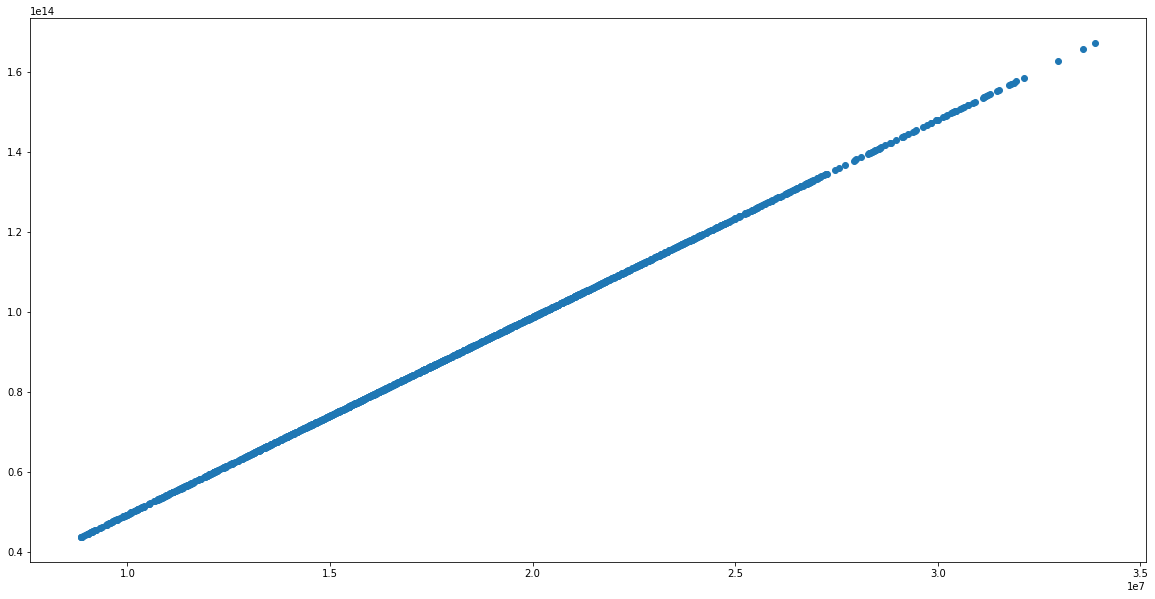

In [277]:
plt.scatter(y_test, predictions) # It is showing a linear regression

C:\Users\ajaym\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ADJUST_SALE_PRICE', ylabel='Density'>

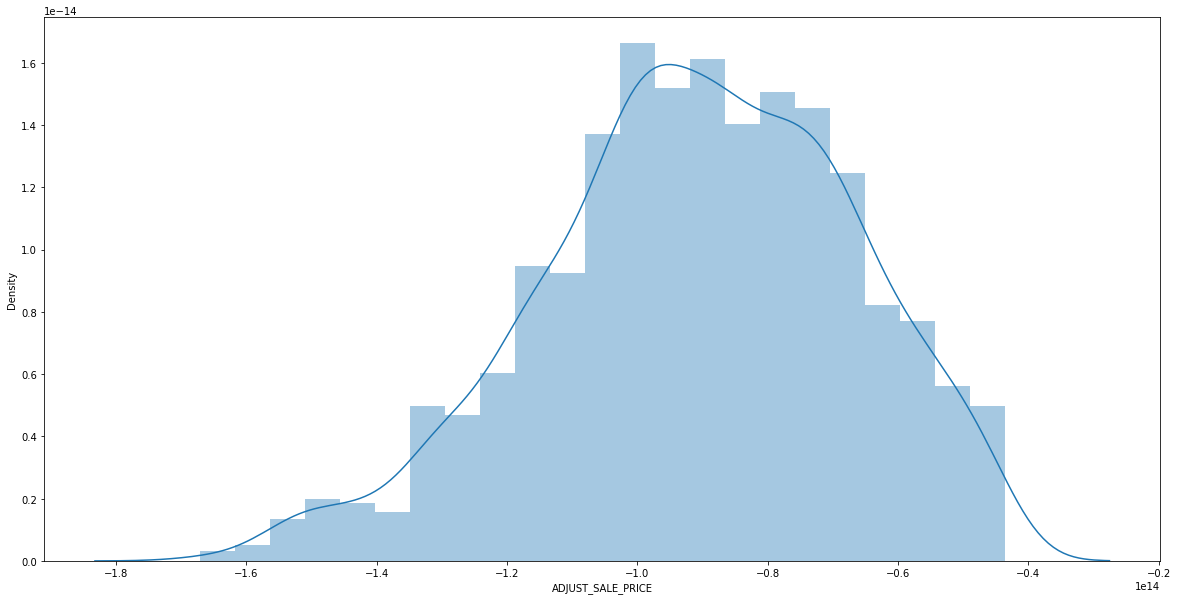

In [278]:
sns.distplot((y_test - predictions))

In [279]:
# In the Adjusted sales price itself it is showing normal distribution

C:\Users\ajaym\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ADJUST_SALE_PRICE', ylabel='Density'>

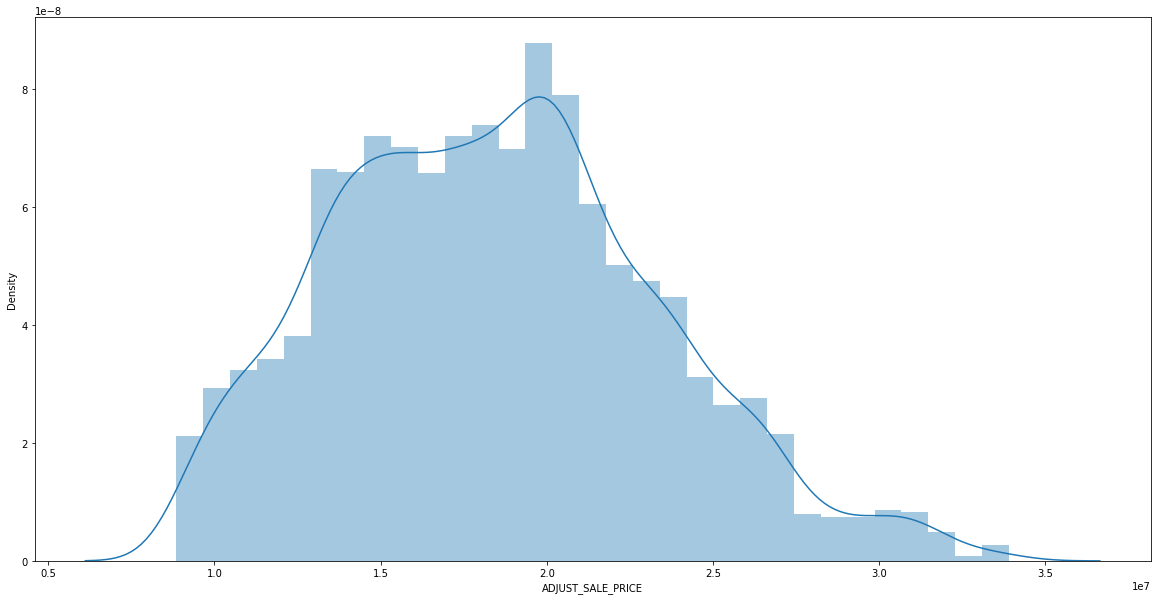

In [280]:
sns.distplot(df13.ADJUST_SALE_PRICE)

Decision Tree

In [281]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(random_state = 0, max_depth = 2)
dec_tree.fit(X_train_scaled, y_train)

prediction_dec_tree = dec_tree.predict(X_test)
prediction_dec_tree

array([26612891.9207942, 26612891.9207942, 26612891.9207942, ...,
       26612891.9207942, 26612891.9207942, 26612891.9207942])

In [282]:
from sklearn.metrics import mean_squared_error, r2_score
mse_dt = mean_squared_error(y_test, prediction_dec_tree)
print("The MSE value %f" %mse_dt)
print("The validation score %f"%dec_tree.score(X_test_scaled, y_test))

The MSE value 90320433136988.328125
The validation score 0.895251


Random Forest

In [283]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error as MSE

In [284]:
regr = RandomForestRegressor(n_estimators= 500, max_depth=2, random_state=0)
regr.fit(X_train_scaled, y_train)
print("Validation_score %f" %regr.score(X_test_scaled, y_test))
y_pred = regr.predict(X_test_scaled)
print(y_pred)
rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE: % f" %(rmse))

Validation_score 0.909772
[16492255.4538971  16492255.4538971  20793684.1515345  ...
 16492255.4538971  20890834.73783492 20352741.23122694]
RMSE:  1461318.652836


XGboost Regression

In [285]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE 
model_xgboost = xgb.XGBRegressor(n_estimators = 10, seed = 123)
model_xgboost.fit(X_train_scaled, y_train)
y_pred = model_xgboost.predict(X_test_scaled)
print(y_pred)
print("Validation_score: %f" %model_xgboost.score(X_test_scaled, y_test))
rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE : %f" %(rmse))

[16509858. 14768133. 18365864. ... 16509858. 19595902. 18288458.]
Validation_score: 0.986406
RMSE : 567209.542381


KNN 

In [286]:
from sklearn.neighbors import KNeighborsRegressor
k_nn = KNeighborsRegressor(n_neighbors = 10)
k_nn.fit(X_train_scaled, y_train)
print("Validation_score: %f" %k_nn.score(X_test_scaled, y_test))

Validation_score: 0.838675


In [306]:
X.columns

Index(['INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'ADJUST_SALE_PRICE',
       'Adyar', 'Ana Nagar', 'Ann Nagar', 'Anna Nagar', 'Chormpet', 'Chrmpet',
       'Chrompet', 'Chrompt', 'KK Nagar', 'Karapakam', 'Karapakkam', 'T Nagar',
       'TNagar', 'Velachery', 'Velchery', 'AbNormal', 'AdjLand', 'Family',
       'Normal Sale', 'Partial', 'No', 'Yes', 'Commercial', 'House', 'Others',
       'AllPub', 'ELO', 'NoSeWa', 'NoSewr', 'Gravel', 'No Access', 'Paved'],
      dtype='object')

Voting Regressor

In [307]:
from sklearn.ensemble import VotingRegressor


In [308]:
model1 = LinearRegression()
model2 = DecisionTreeRegressor(random_state = 0, max_depth= 2)
model3 = KNeighborsRegressor(n_neighbors = 5)
model4 = RandomForestRegressor(n_estimators = 500, max_depth = 2, random_state = 0)
model5 = xgb.XGBRegressor(n_estimators = 10, seed = 123)
model = VotingRegressor([('lr', model1),('dec',model2),('knn', model3), ('Rand',model4), ('xgb', model5)])
model.fit(X_train, y_train)
preds = model.predict(X_test)
model.score(X_test,y_test)

0.9834035029915613

### K4 Cross Validation

In [309]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([1., 1., 1., 1., 1.])

K4 cross validation for XGB

In [310]:
import xgboost as xgb
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(xgb.XGBRegressor(n_estimators = 10, seed = 123),X,y,cv=cv)

array([0.98776791, 0.98680607, 0.98722169, 0.98628412, 0.98650822])

In [311]:
#Creating a shuffleslpit for the cross validation to randomize the sample hence each of the fold will have equal distribution of data sample, here K4 cross validation is done for xgboost

K4 Cross validatior KNN

In [312]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(KNeighborsRegressor(n_neighbors = 10),X,y,cv=cv)

array([0.99998432, 0.9999932 , 0.99999428, 0.99995993, 0.99996175])

K4 Cross validation for Random Forest Regressor

In [313]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(RandomForestRegressor(n_estimators= 500, max_depth=2, random_state=0),X,y,cv=cv)

array([0.91063671, 0.90854936, 0.91454428, 0.90722713, 0.90263715])

K4 Cross validation for Decision Tree

In [314]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(DecisionTreeRegressor(random_state = 0, max_depth = 2),X,y,cv=cv)

array([0.89937883, 0.89242966, 0.9011487 , 0.8975497 , 0.88984766])

In [315]:
# From performing K4 Cross Validation for the algorithms we came to the conclusion that KNN machine learning algorithm provides the best results

Hyperparameter tuning

In [316]:
from sklearn.ensemble import GradientBoostingRegressor
for lr in [0.01, 0.05, 0.1,0.3,0.5,0.8,1]:
    model = GradientBoostingRegressor(learning_rate= lr)
    model.fit(X_train, y_train)
    print("Learning rate: ", lr, "Train_Score:", model.score(X_train, y_train), "Test score: ", model.score(X_test, y_test))

Learning rate:  0.01 Train_Score: 0.8570630222078556 Test score:  0.8573277481006921
Learning rate:  0.05 Train_Score: 0.9999217680849493 Test score:  0.9999145185393662
Learning rate:  0.1 Train_Score: 0.9999329963370703 Test score:  0.9999080416846063
Learning rate:  0.3 Train_Score: 0.9999170827275399 Test score:  0.9998886077192498
Learning rate:  0.5 Train_Score: 0.9999662596036477 Test score:  0.9999424222183327
Learning rate:  0.8 Train_Score: 0.9999745787856358 Test score:  0.9999387182953479
Learning rate:  1 Train_Score: 0.9999708286687986 Test score:  0.9998992389258677


In [317]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01, 0.02, 0.03, 0.04, 0.05,0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.2,0.5, 0.7, 1]:
    model = xgb.XGBRegressor(learning_rate = lr, n_estimators = 100)
    model.fit(X_train, y_train)
    model.score(X_test, y_test)
    print("Learning rate: ", lr , "Training Score: ", model.score(X_train, y_train), "Cross-val score:", np.mean(cross_val_score(model,X,y)))

Learning rate:  0.01 Training Score:  -1.0382665710697756 Cross-val score: -2.3028297173253742
Learning rate:  0.02 Training Score:  0.7288794897407058 Cross-val score: 0.5619846040066393
Learning rate:  0.03 Training Score:  0.9645605214957008 Cross-val score: 0.9426647746572149
Learning rate:  0.04 Training Score:  0.9954326180452231 Cross-val score: 0.9925368610349393
Learning rate:  0.05 Training Score:  0.999405717343731 Cross-val score: 0.9989246827396785
Learning rate:  0.1 Training Score:  0.9999671148830279 Cross-val score: 0.9998181198070402
Learning rate:  0.11 Training Score:  0.9999672491185506 Cross-val score: 0.9998105437332304
Learning rate:  0.12 Training Score:  0.999967395131884 Cross-val score: 0.9997986651754365
Learning rate:  0.13 Training Score:  0.999966960396739 Cross-val score: 0.9997940194576284
Learning rate:  0.14 Training Score:  0.999961220842169 Cross-val score: 0.9998053207563766
Learning rate:  0.15 Training Score:  0.999970570843976 Cross-val score: 

In [318]:
# Finding the best models using GridSearchCV

In [319]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression


def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression':{
            'model': LinearRegression(),
            'params':{
                'normalize': [True,False]
                
            }
        },
        
        'Knn':{
            'model':KNeighborsRegressor(),
            'params':{
                'n_neighbors' : [10]
            }
            
        },
        'xgboost':{
            'model': xgb.XGBRegressor(),
            'params':{
                'n_estimators':[10],
                'seed':[123]
            }
            
        },
        
        'decision_tree':{
            'model': DecisionTreeRegressor(),
            'params':{
                'random_state': [0], 
                'max_depth': [2]
            }
            
        },
        'random_forest_regressor':{
            'model': RandomForestRegressor(),
            'params':{
                'n_estimators': [500], 
                'max_depth': [2], 
                'random_state':[0]
            }
            
        }
        
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])


find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,1.000000,{'normalize': False}
1,Knn,0.999979,{'n_neighbors': 10}
2,xgboost,0.986918,"{'n_estimators': 10, 'seed': 123}"
3,decision_tree,0.896071,"{'max_depth': 2, 'random_state': 0}"
4,random_forest_regressor,0.908719,"{'max_depth': 2, 'n_estimators': 500, 'random_..."


In [320]:
# In the hyper parameter testing using gridsearchcv 5 fold cross validation is used 

In [321]:
# From the hyperparameter testing It is clear that we need to use the knn for price prediction

In [322]:
X.columns

Index(['INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'ADJUST_SALE_PRICE',
       'Adyar', 'Ana Nagar', 'Ann Nagar', 'Anna Nagar', 'Chormpet', 'Chrmpet',
       'Chrompet', 'Chrompt', 'KK Nagar', 'Karapakam', 'Karapakkam', 'T Nagar',
       'TNagar', 'Velachery', 'Velchery', 'AbNormal', 'AdjLand', 'Family',
       'Normal Sale', 'Partial', 'No', 'Yes', 'Commercial', 'House', 'Others',
       'AllPub', 'ELO', 'NoSeWa', 'NoSewr', 'Gravel', 'No Access', 'Paved'],
      dtype='object')

In [323]:
X.head()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,ADJUST_SALE_PRICE,Adyar,Ana Nagar,Ann Nagar,Anna Nagar,Chormpet,...,Commercial,House,Others,AllPub,ELO,NoSeWa,NoSewr,Gravel,No Access,Paved
0,909,1,1,3,2.041424e+07,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1,1056,1,1,3,1.858461e+07,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,1136,1,1,3,1.562741e+07,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3,730,1,1,2,1.441292e+07,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,904,1,1,3,2.083445e+07,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [324]:
np.where(X.columns == 'Adyar')[0][0]

5

Function to predict the price of the flat when the Location, Squarefeet, Number of Bathrooms and Number of Bedrooms are given

In [325]:
def predict_price(location,sqft,nbed,nbathroom,nroom):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft;
    x[1] = nbed;
    x[2] = nbathroom;
    x[3] = nroom;
    if loc_index >= 0:
        x[loc_index] = 1
    return k_nn.predict([x])[0]

In [326]:
predict_price('Adyar',909,1,1,3)

22951505.596749656